In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

# generate a daily signal covering one year 2016 in a pandas dataframe
N = 360
df_train = pd.DataFrame({"Date" : pd.date_range(start="2016-01-25", periods=N, freq='D'),
                         "Signal" : (np.arange(N)//40 + np.arange(N) % 21 + np.random.randn(N))})


In [2]:
df_train.head(12)

Date     Signal
0  2016-01-25   1.031317
1  2016-01-26   2.058889
2  2016-01-27   2.912122
3  2016-01-28   4.265799
4  2016-01-29   3.337384
5  2016-01-30   4.888929
6  2016-01-31   5.435346
7  2016-02-01   6.495414
8  2016-02-02   6.792733
9  2016-02-03   9.727333
10 2016-02-04  10.347403
11 2016-02-05  10.643055

In [3]:
df_train.tail(12)

Date     Signal
348 2017-01-07  19.259433
349 2017-01-08  19.888202
350 2017-01-09  21.464638
351 2017-01-10  23.263267
352 2017-01-11  25.349591
353 2017-01-12  27.667192
354 2017-01-13  26.148684
355 2017-01-14  27.583328
356 2017-01-15  26.628233
357 2017-01-16   7.727097
358 2017-01-17   9.785630
359 2017-01-18   8.910733

<AxesSubplot: xlabel='Date'>

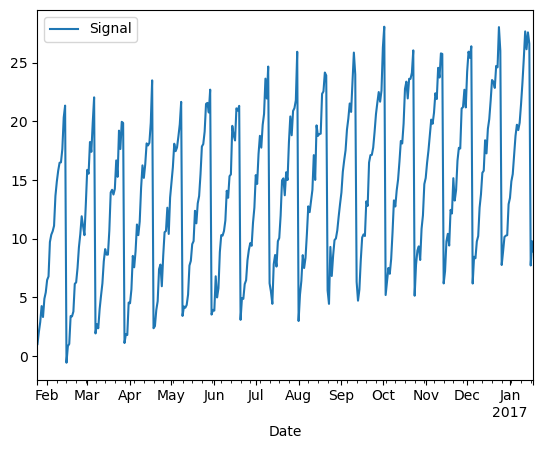

In [4]:
df_train.plot('Date' , ['Signal'])

In [5]:

import pyaf.ForecastEngine as autof
# create a forecast engine. This is the main object handling all the operations
lEngine = autof.cForecastEngine()

# get the best time series model for predicting one week
lEngine.train(iInputDS = df_train, iTime = 'Date', iSignal = 'Signal', iHorizon = 7);
lEngine.getModelInfo() # => relative error 7% (MAPE)


INFO:pyaf.std:TRAINING_ENGINE_START {'Signals': ['Signal'], 'Horizons': {'Signal': 7}}
INFO:pyaf.std:TRAINING_ENGINE_END 4.105
INFO:pyaf.std:TIME_DETAIL TimeVariable='Date' TimeMin=2016-01-25T00:00:00.000000 TimeMax=2016-11-01T00:00:00.000000 TimeDelta=<DateOffset: days=1> Horizon=7
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Signal' Length=360  Min=-0.55767 Max=28.06606  Mean=13.872436 StdDev=6.769823
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_Signal' Min=0.0 Max=1.0  Mean=0.504131 StdDev=0.236511
INFO:pyaf.std:DECOMPOSITION_TYPE 'T+S+R'
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Signal_LinearTrend_residue_Seasonal_DayOfWeek_residue_AR(64)' [LinearTrend + Seasonal_DayOfWeek + AR]
INFO:pyaf.std:TREND_DETAIL '_Signal_LinearTrend' [LinearTrend]
INFO:pyaf.std:CYCLE_DETAIL '_Signal_LinearTrend_residue_Seasonal_DayOfWeek' [Seasonal_DayOfWeek]
INFO:pyaf.std:AUTOREG_DETAIL '_Signal_LinearTrend_residue_Seasonal_DayOfWeek_residu

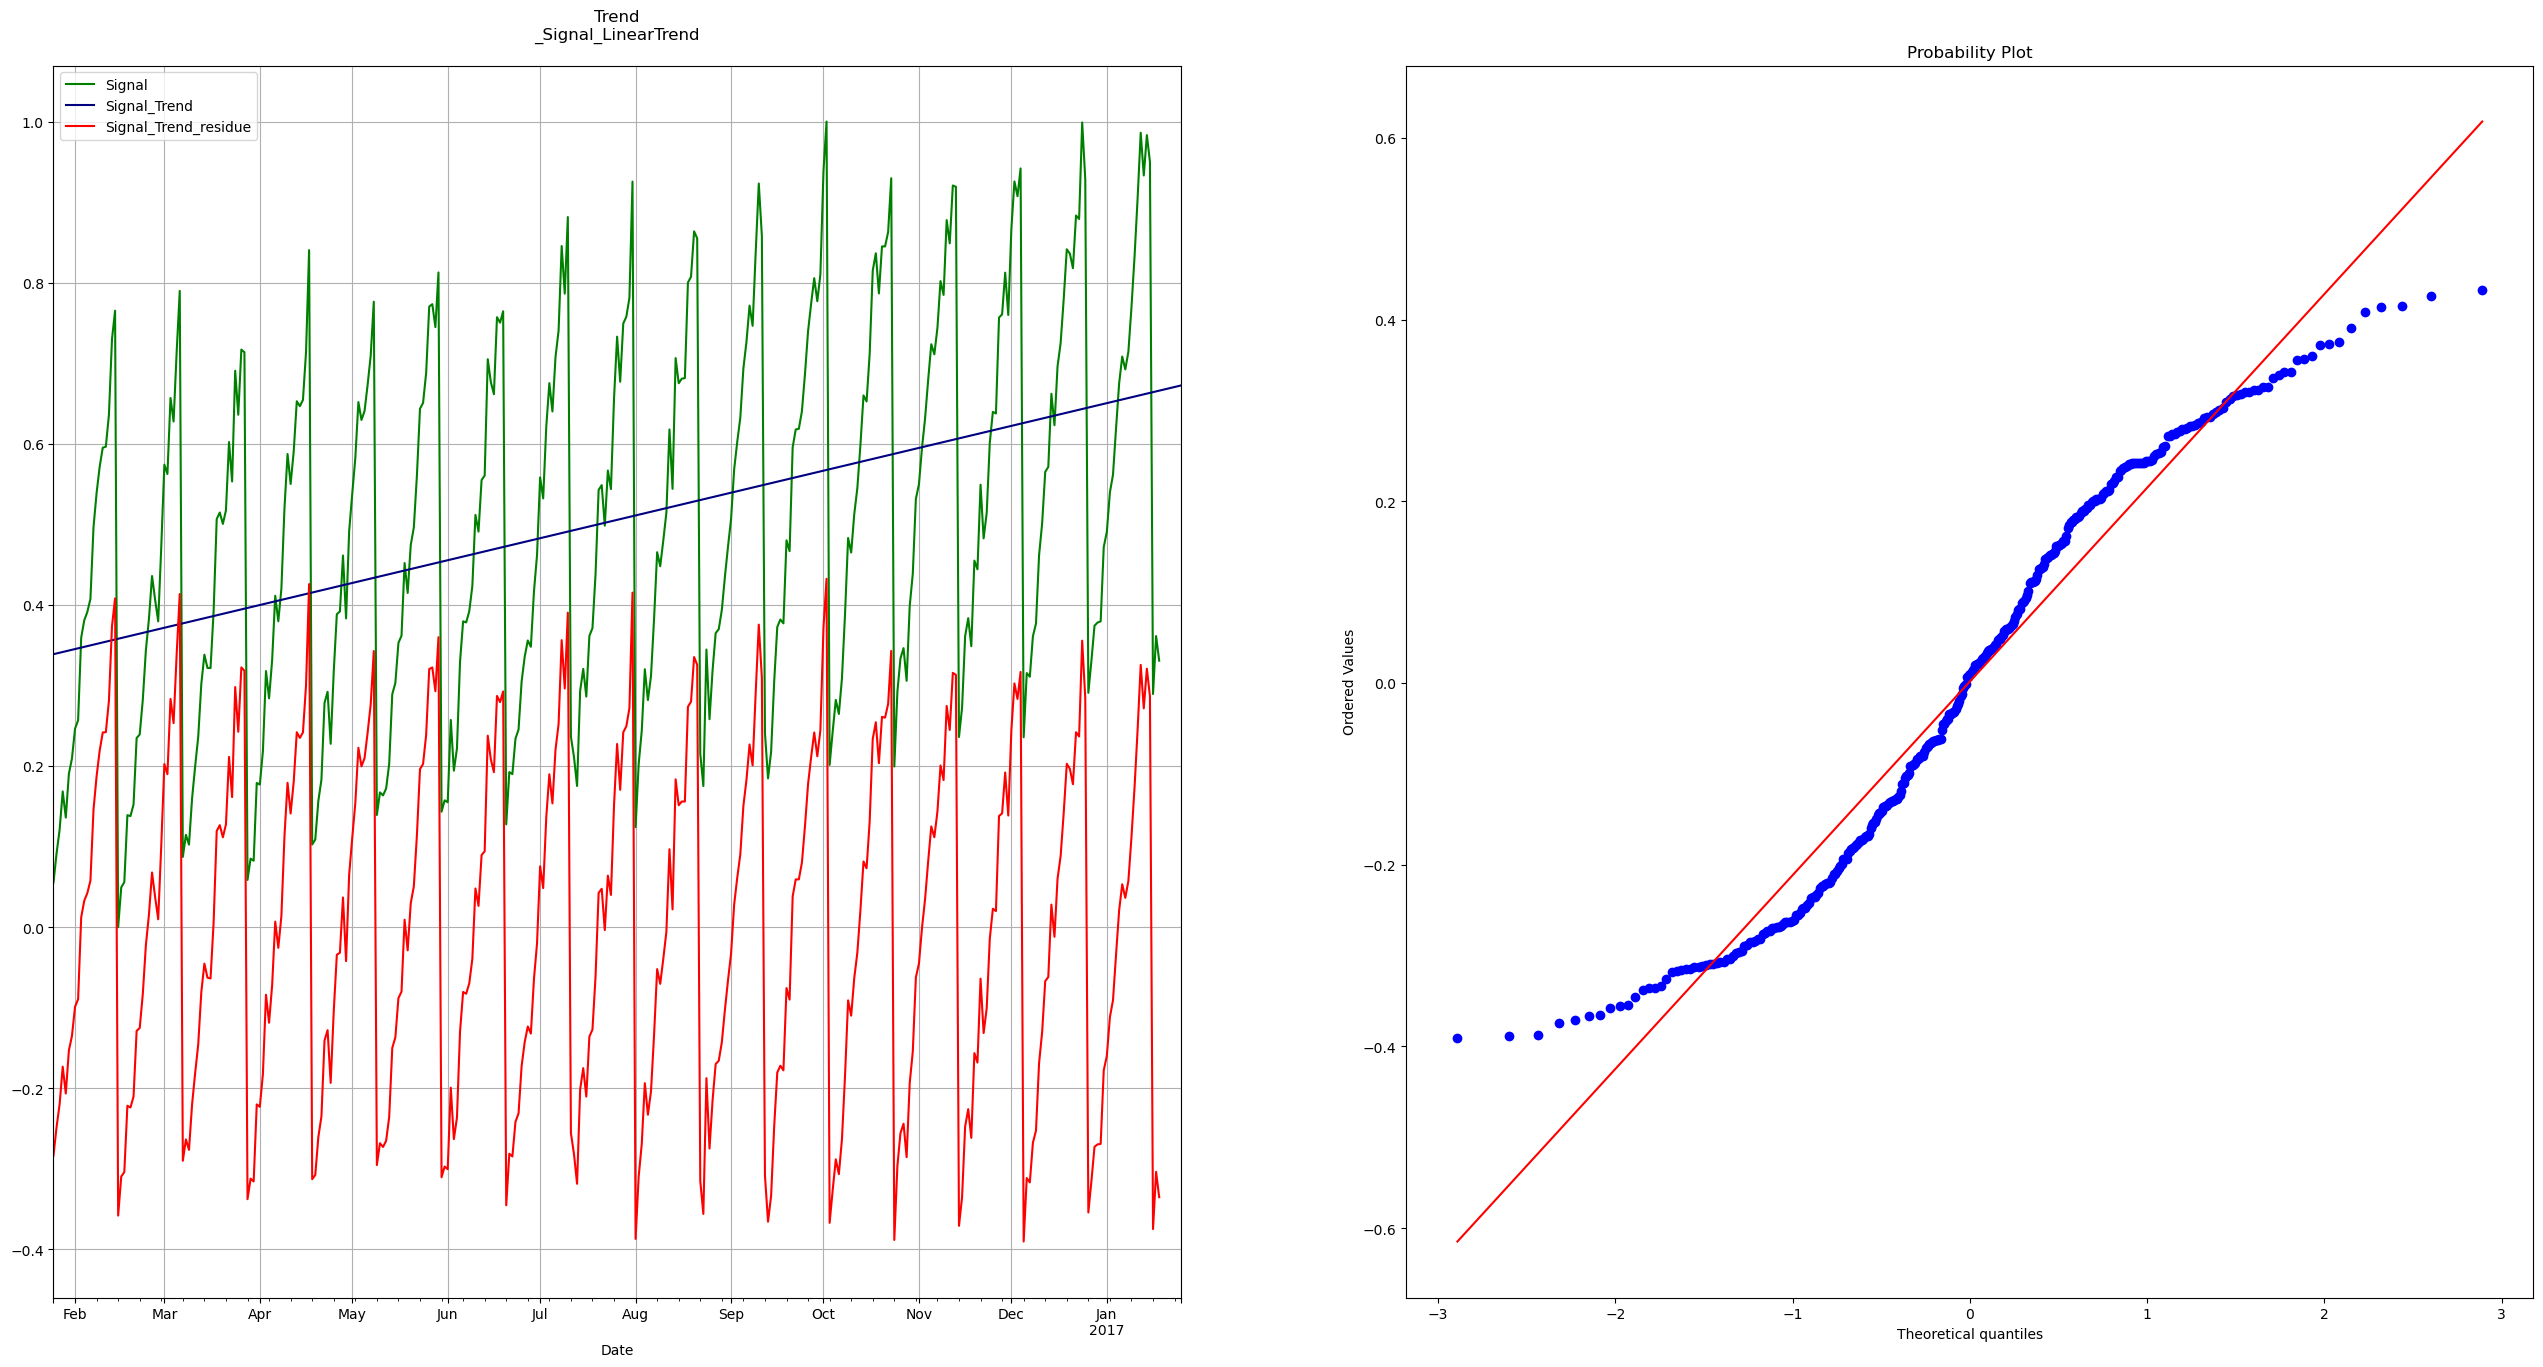

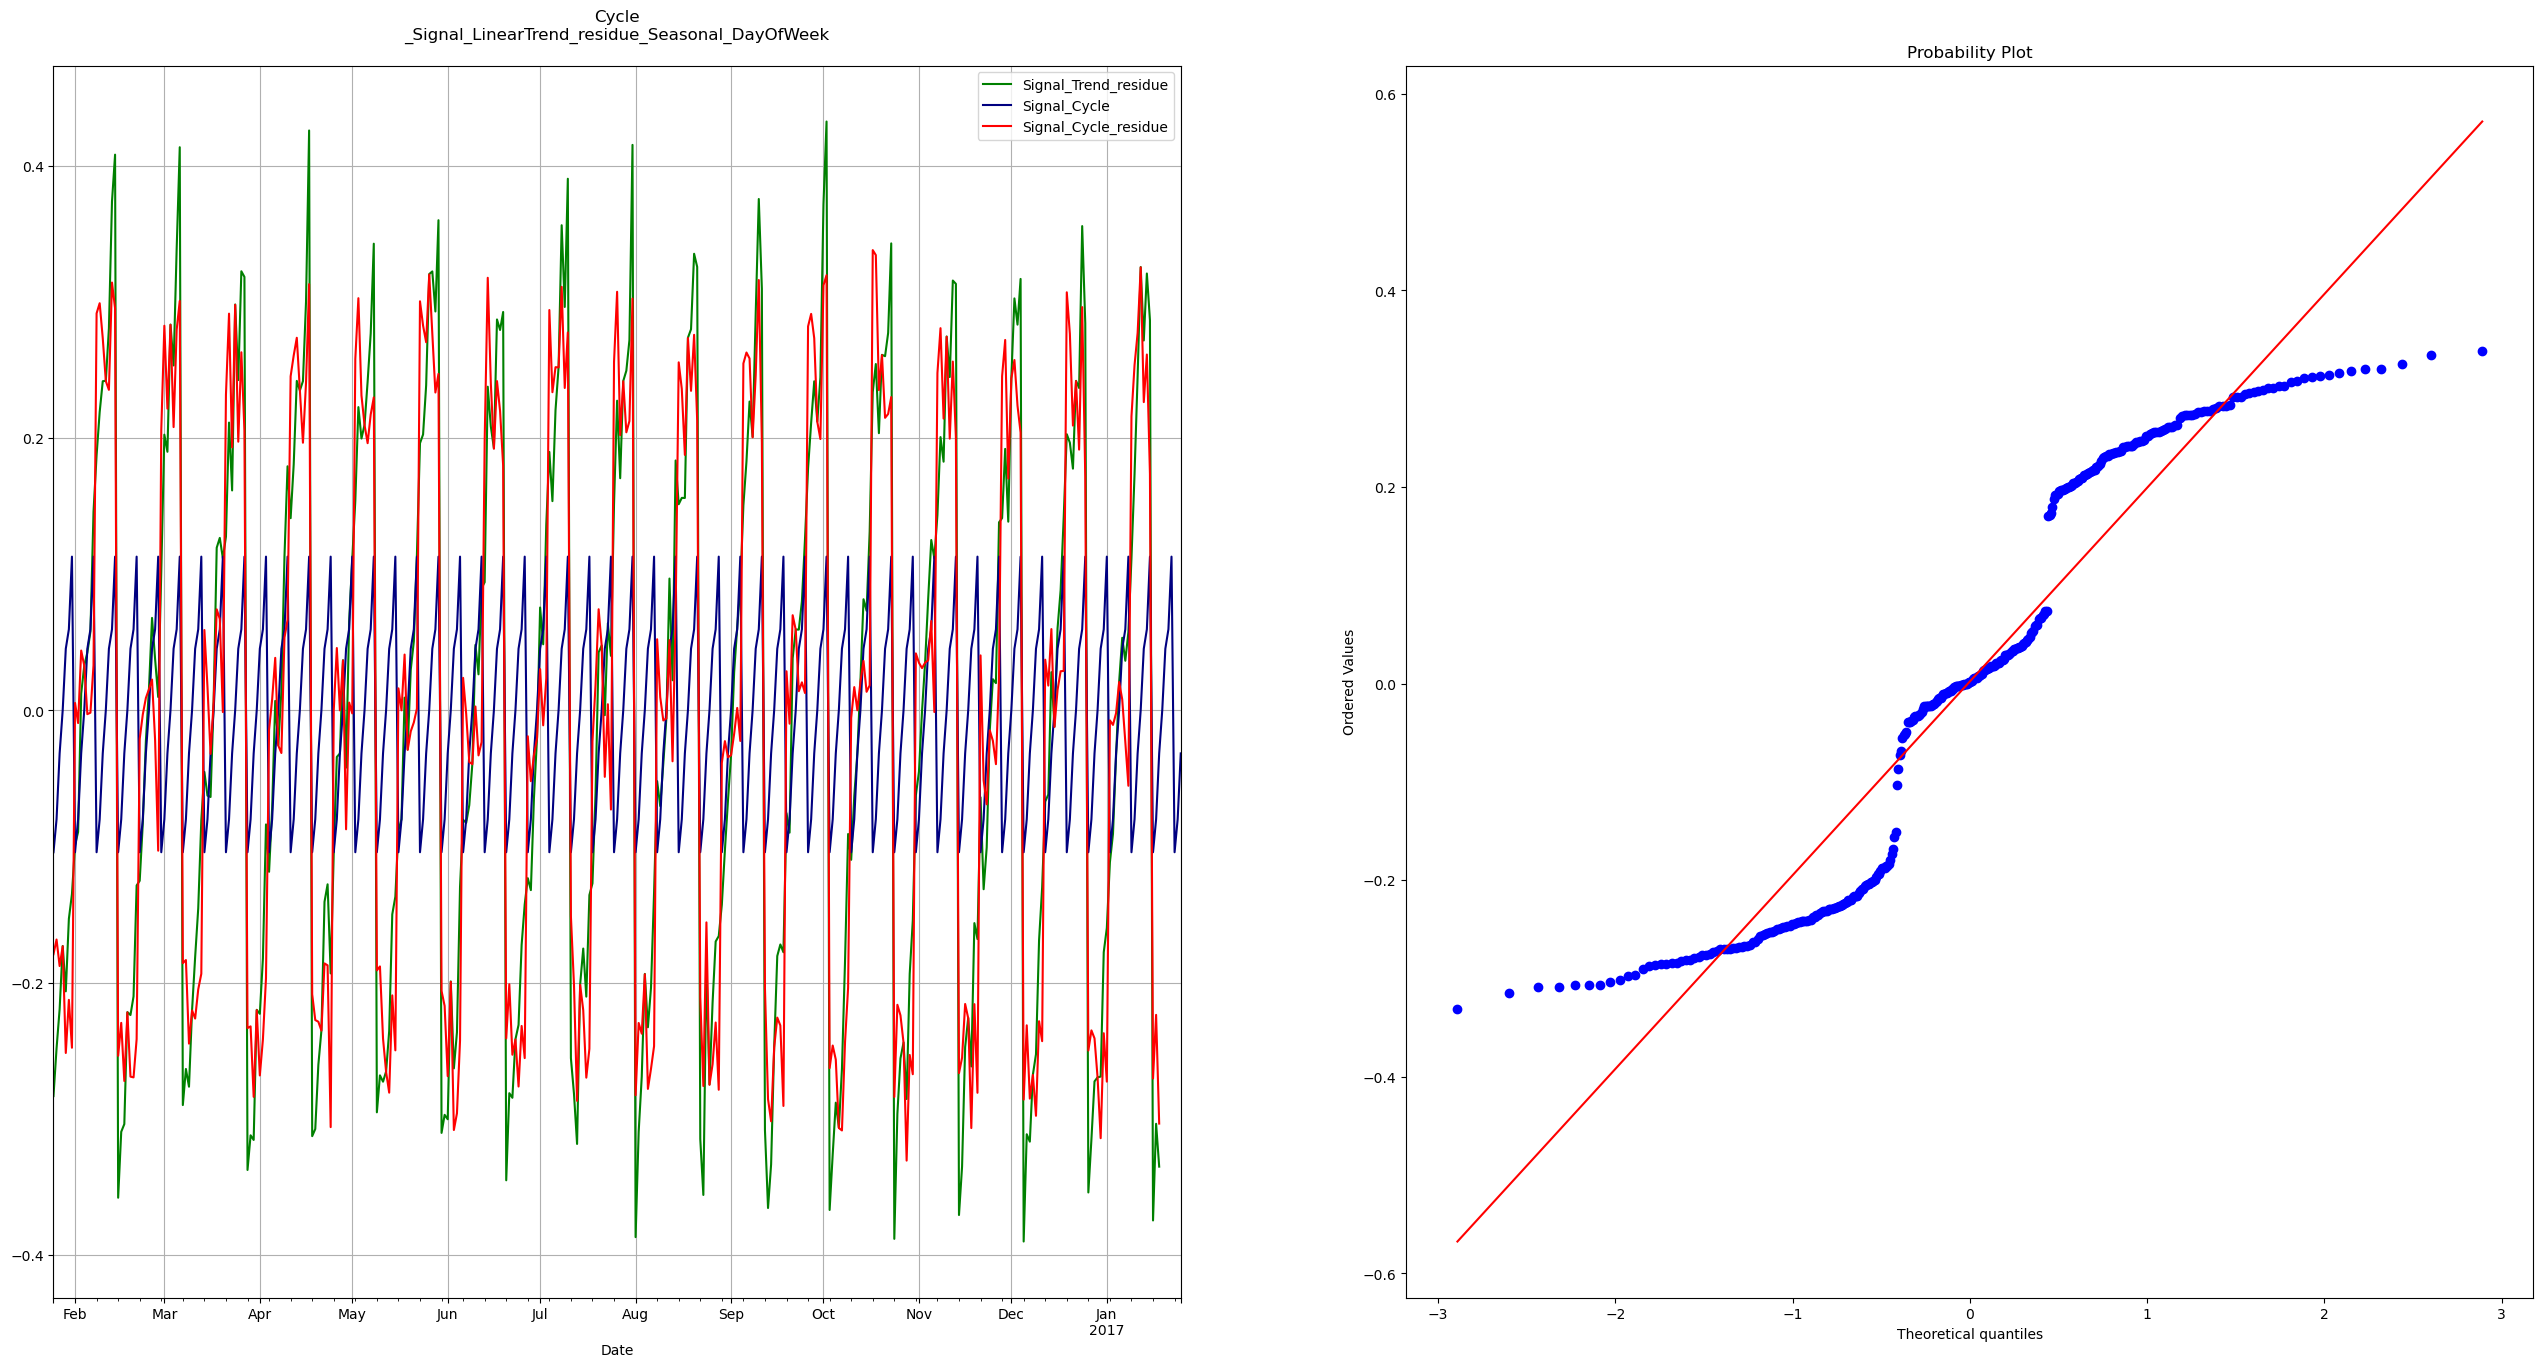

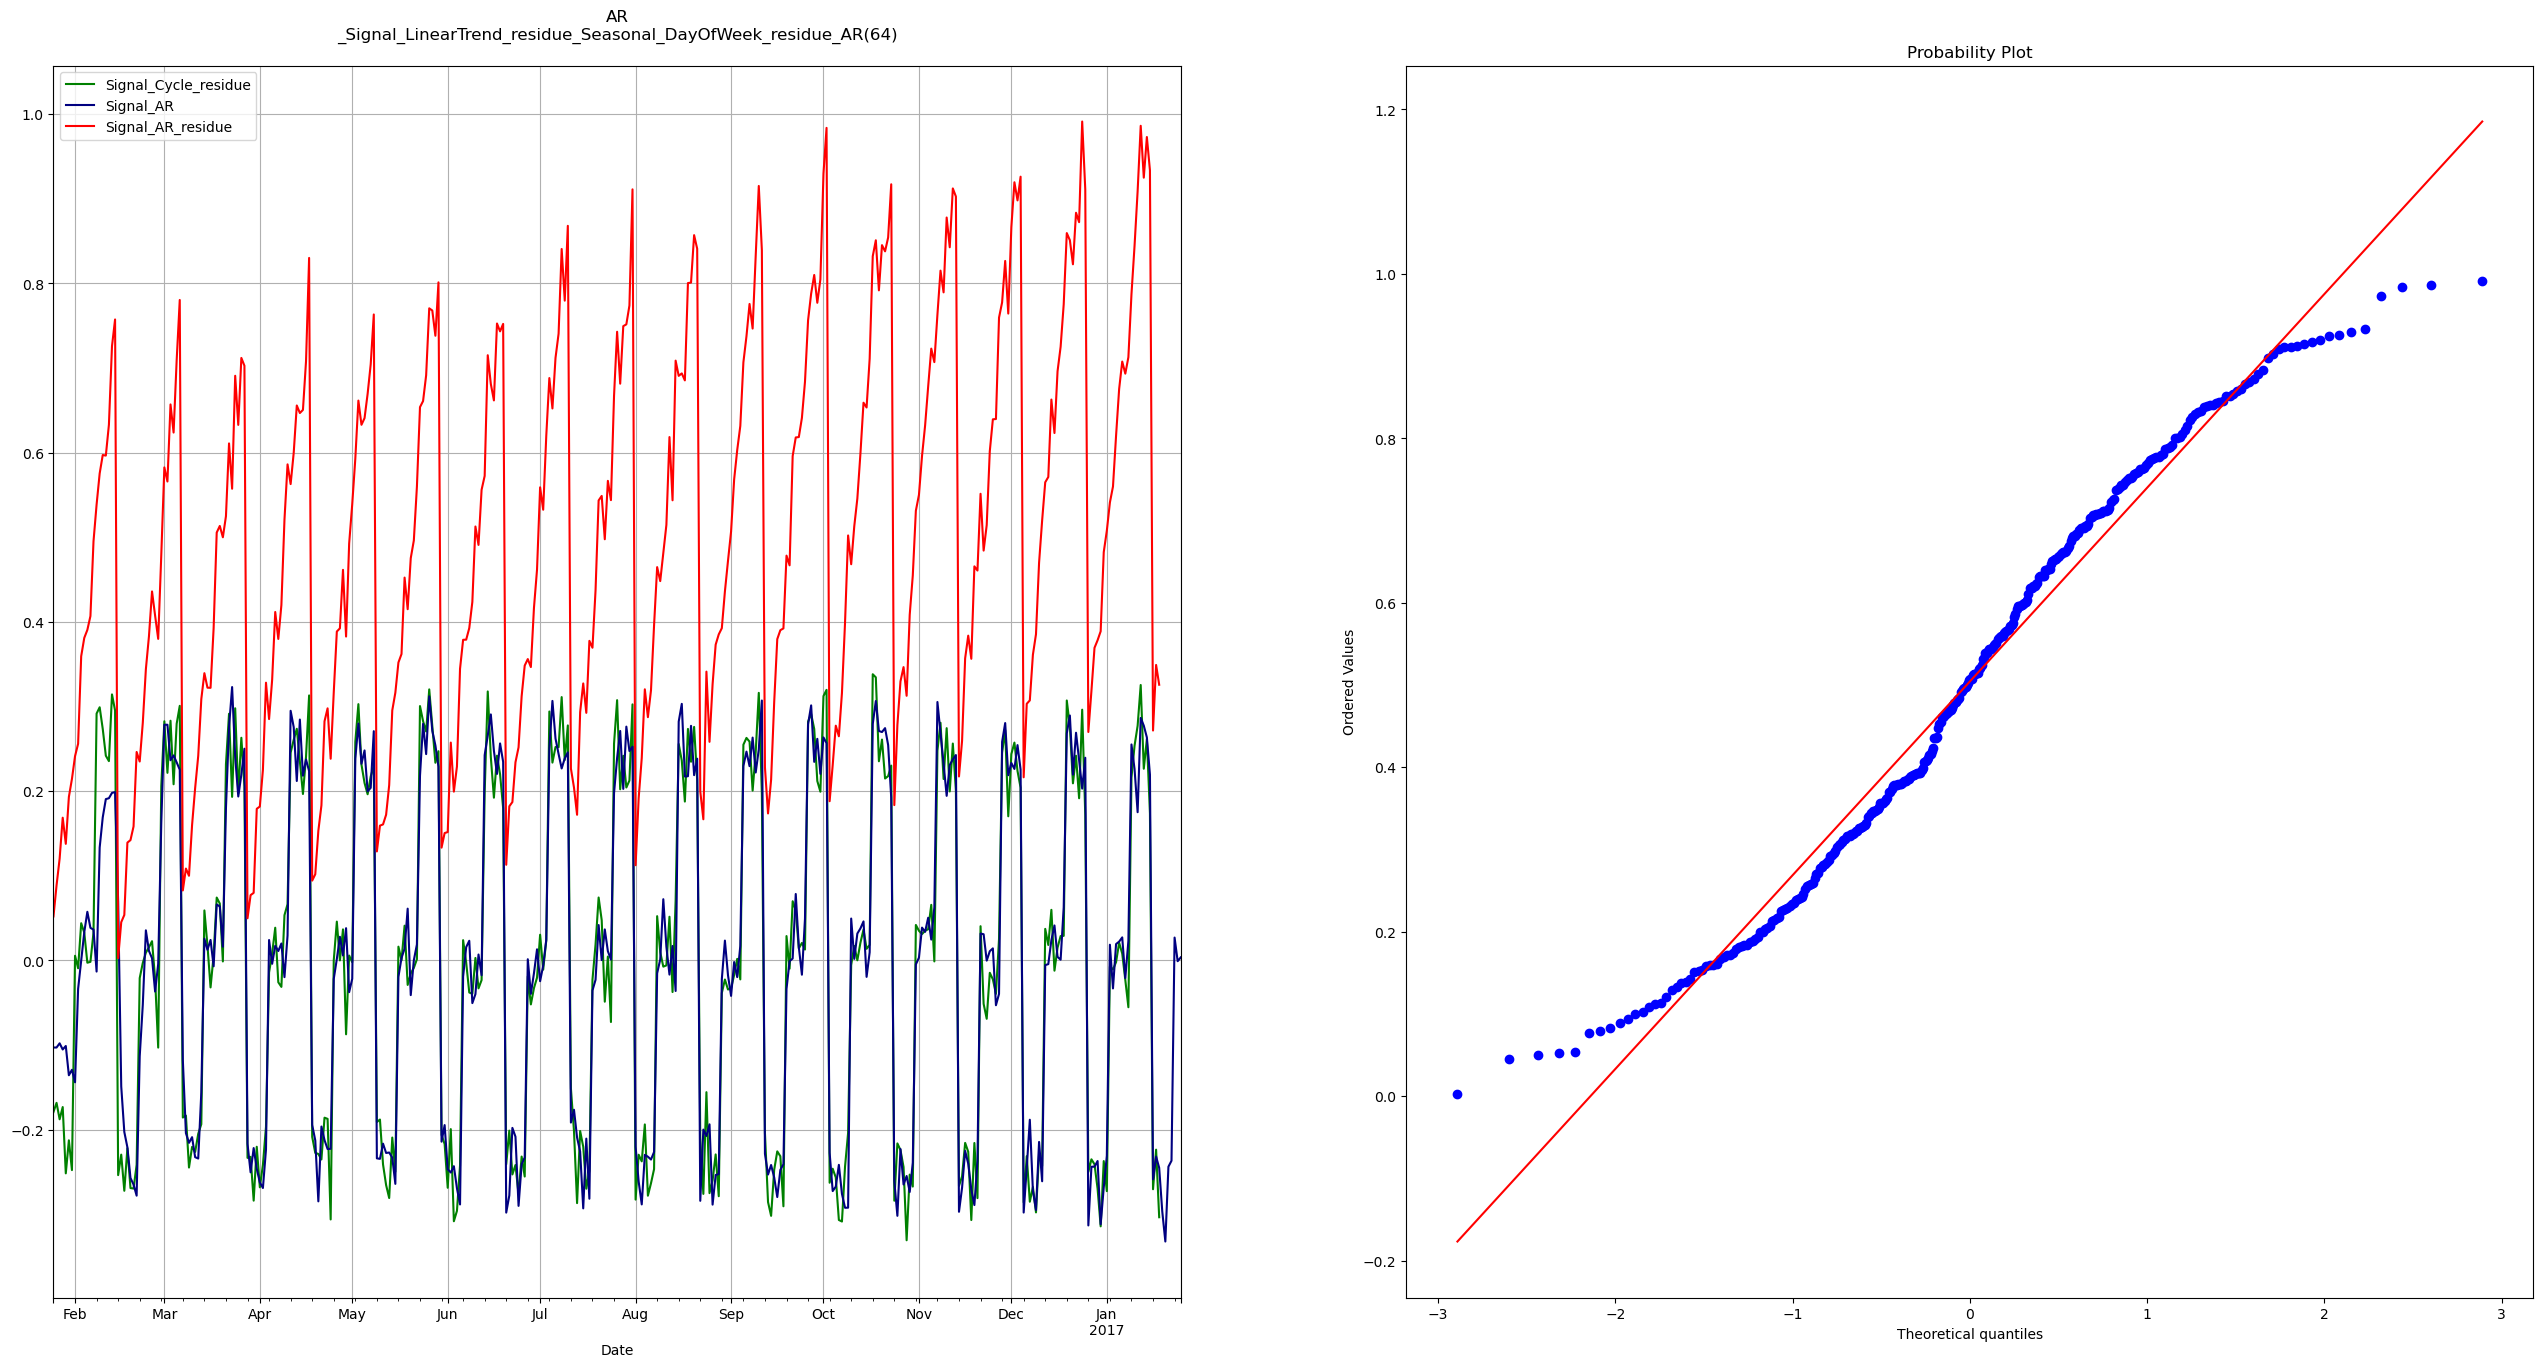

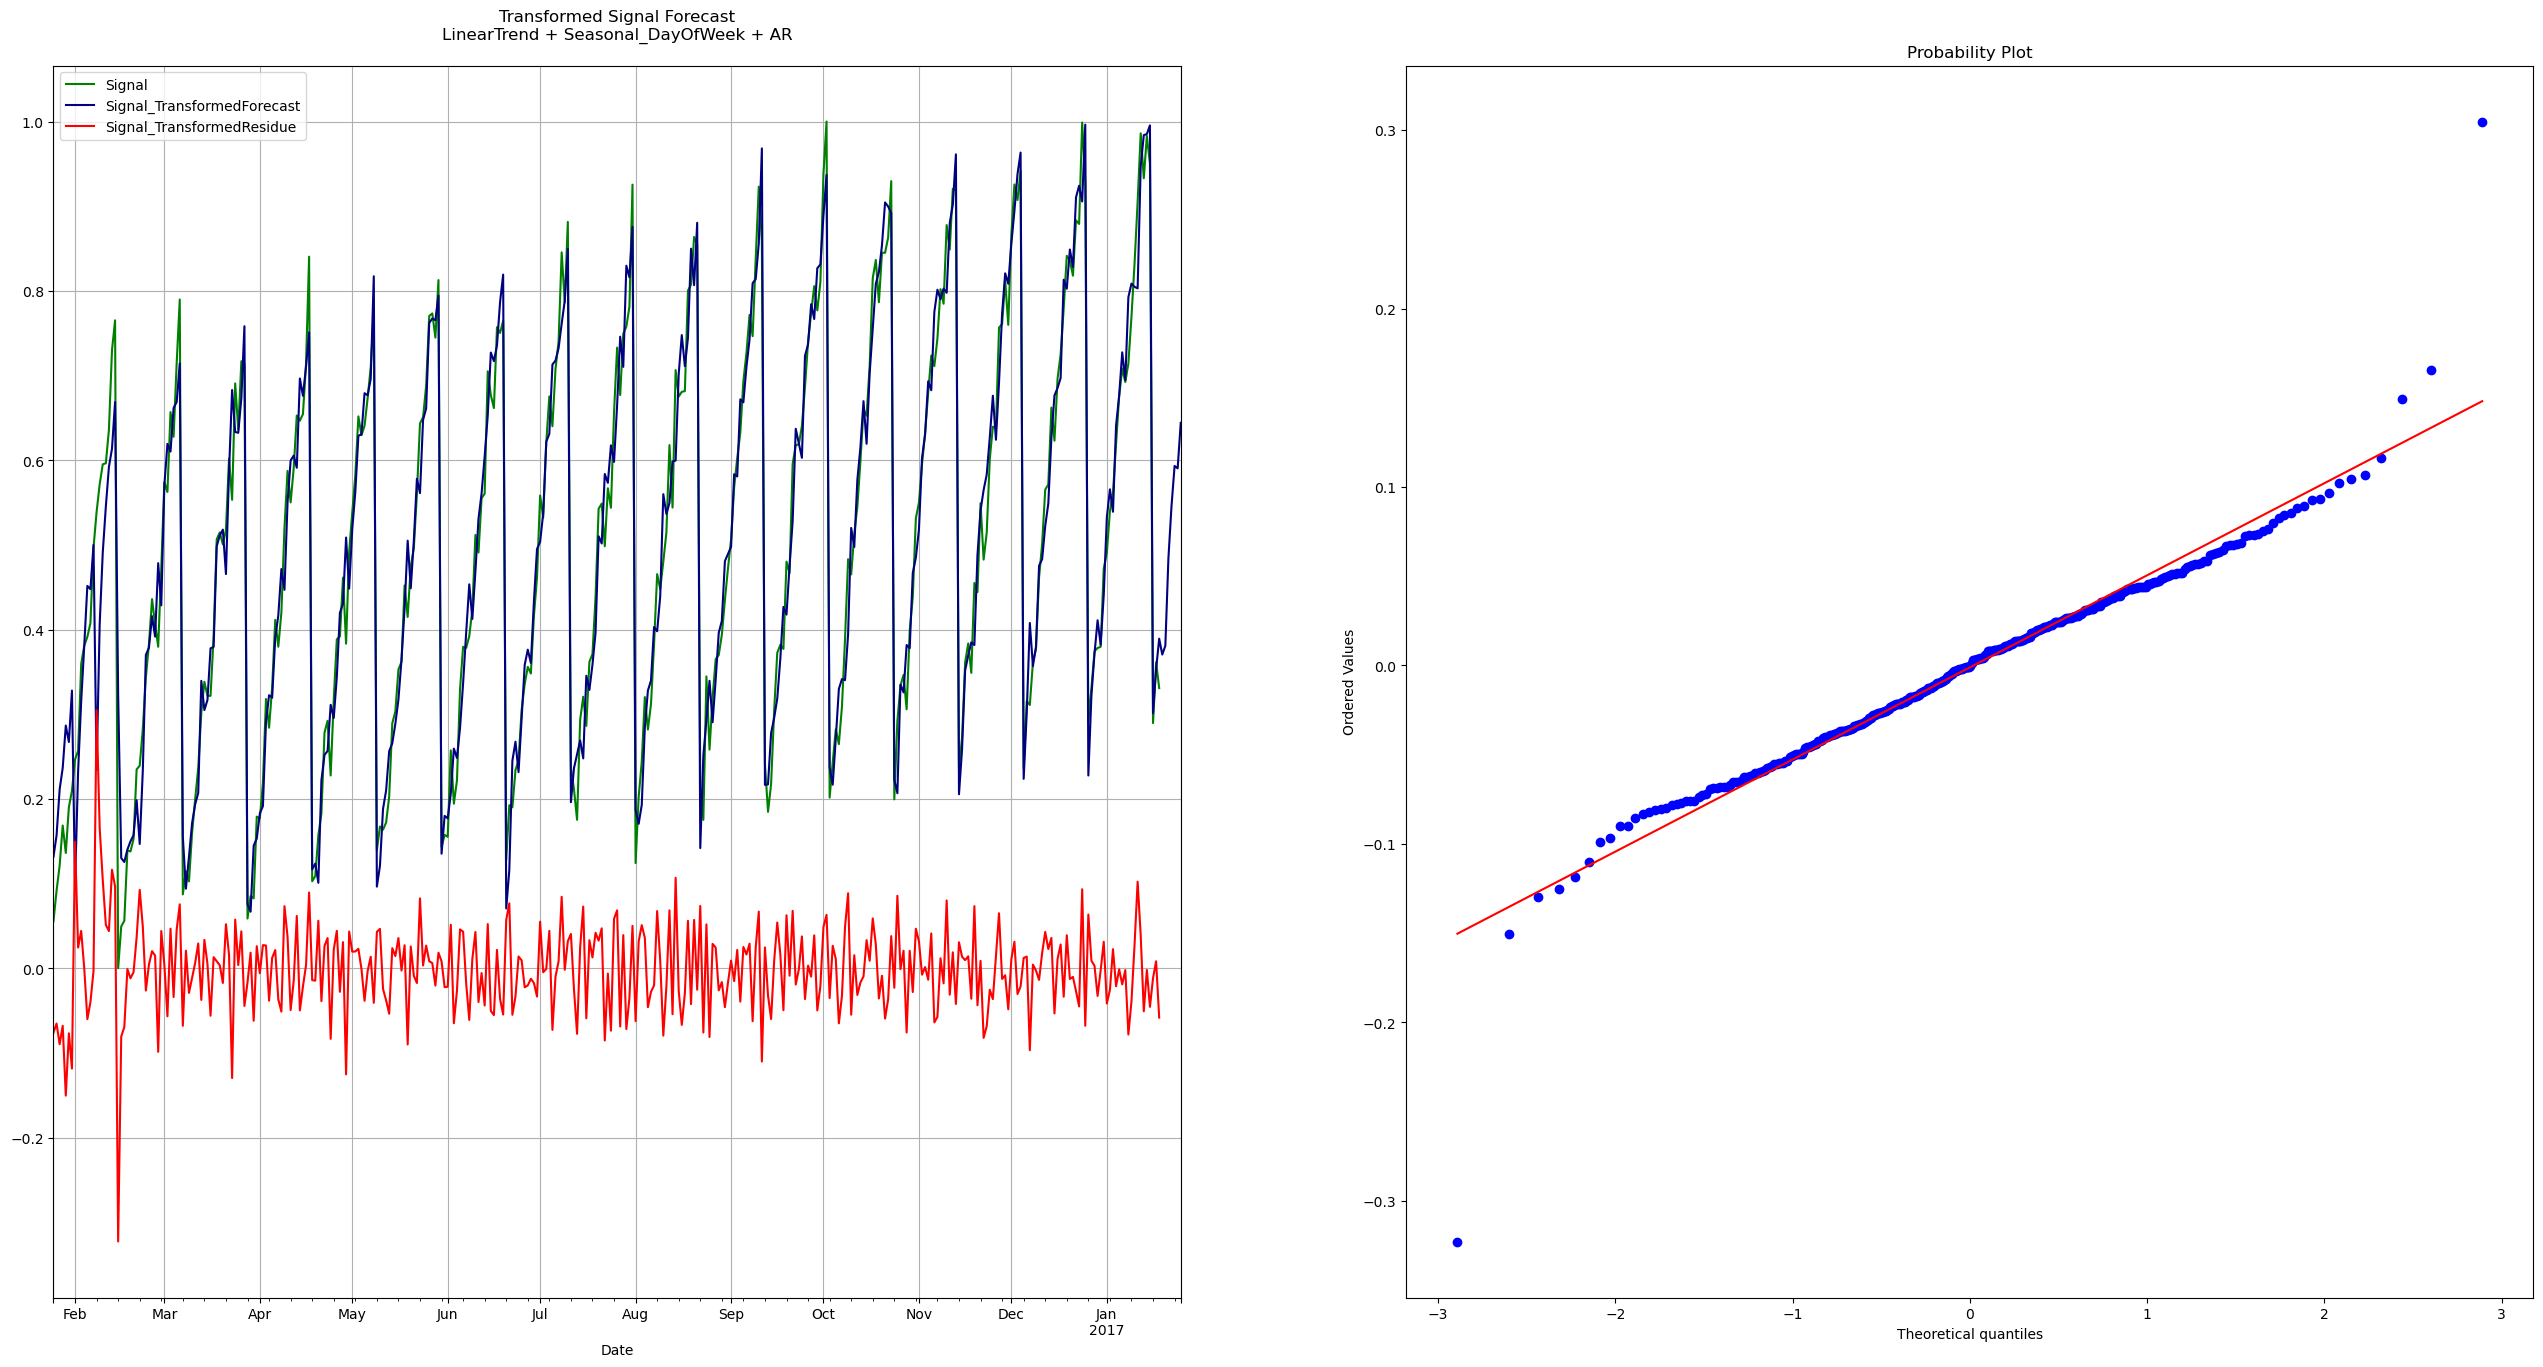

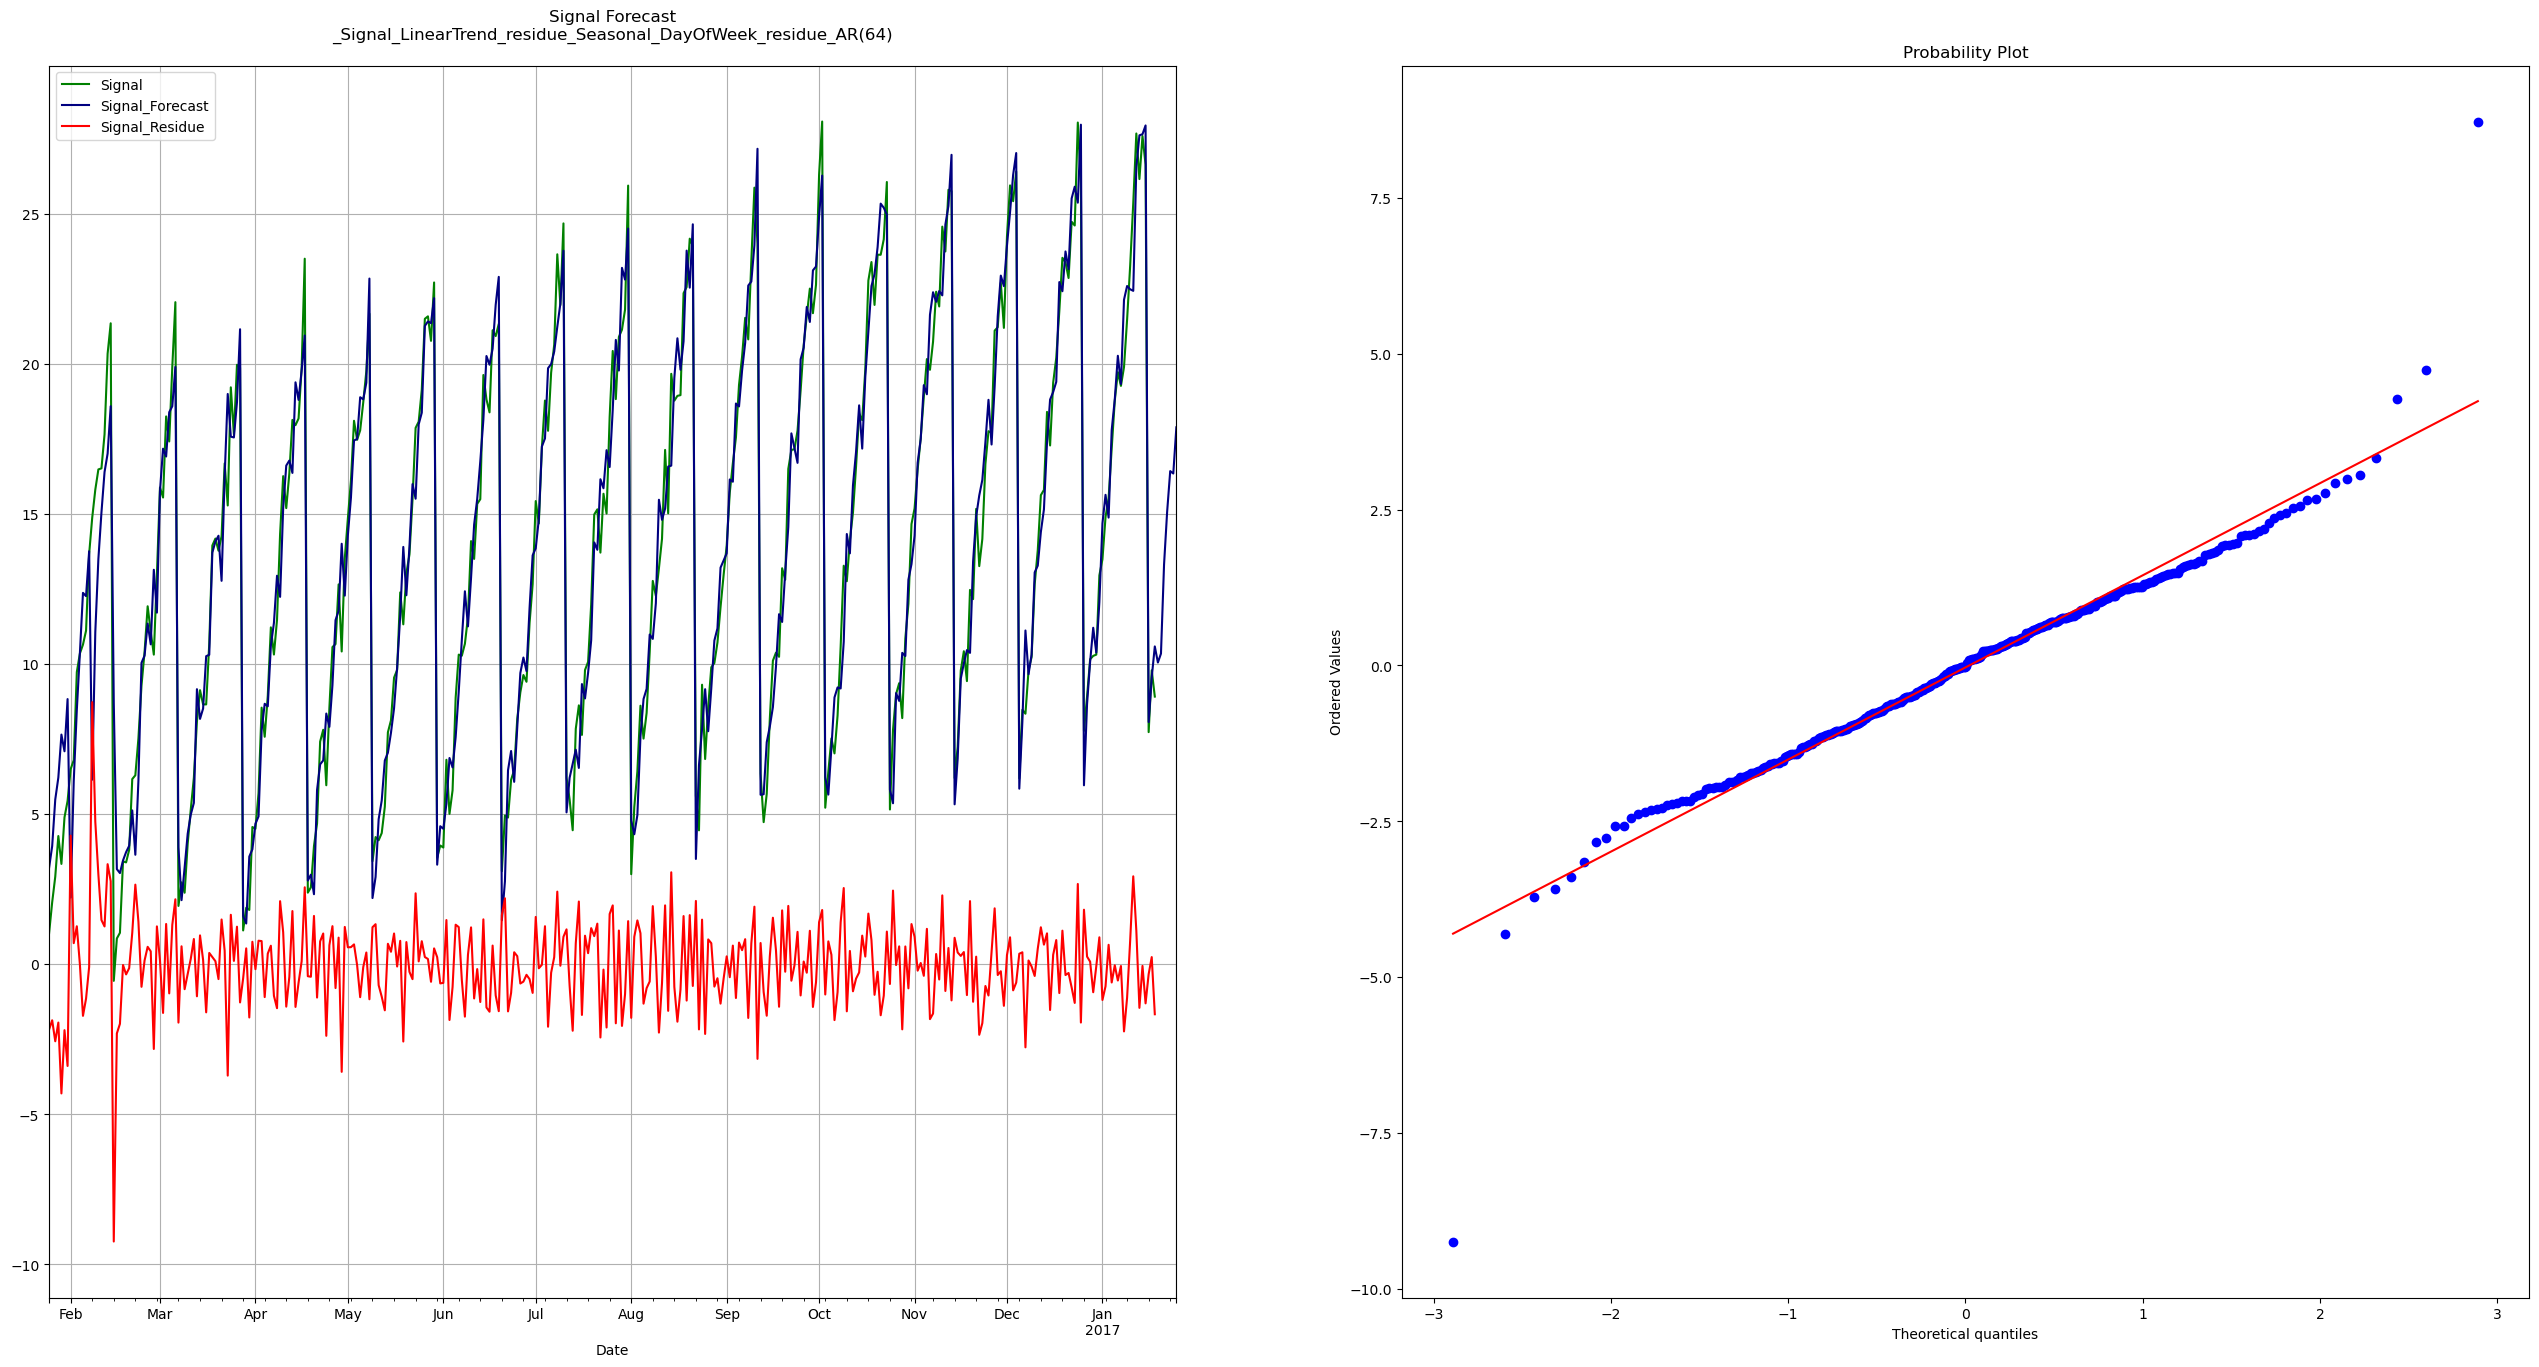

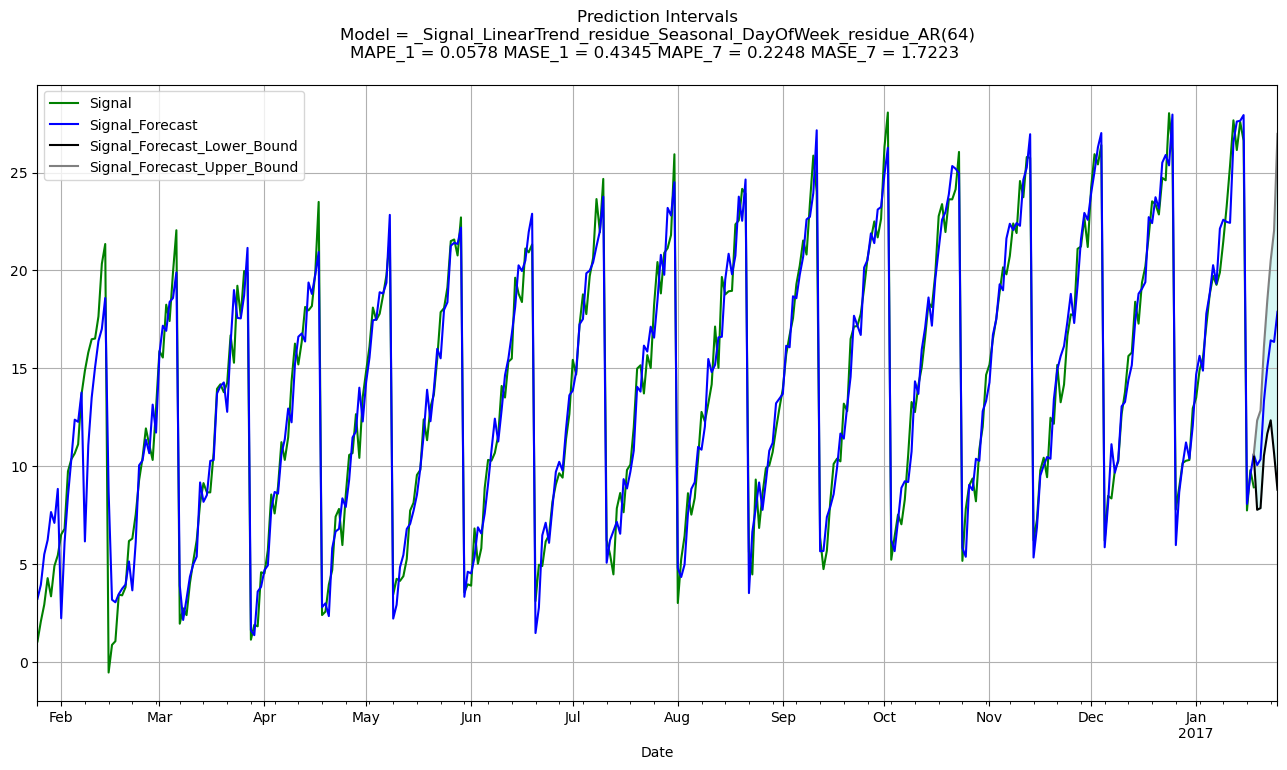

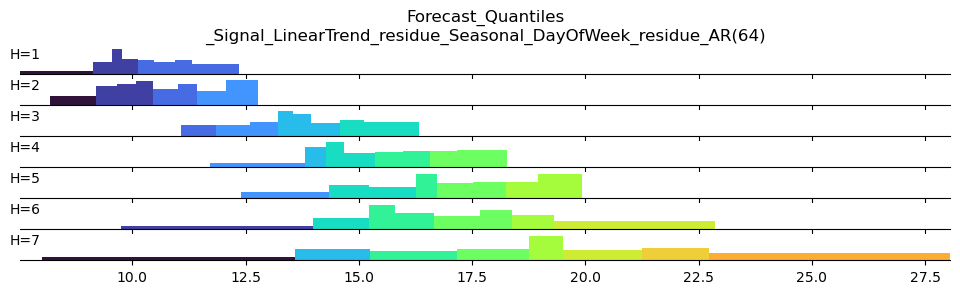

In [6]:
lEngine.standardPlots()

In [7]:

# predict one week
df_forecast = lEngine.forecast(iInputDS = df_train, iHorizon = 7)
# list the columns of the forecast dataset
print(df_forecast.columns) #

# print the real forecasts
# Future dates : ['2017-01-19T00:00:00.000000000' '2017-01-20T00:00:00.000000000' '2017-01-21T00:00:00.000000000' '2017-01-22T00:00:00.000000000' '2017-01-23T00:00:00.000000000' '2017-01-24T00:00:00.000000000' '2017-01-25T00:00:00.000000000']
print(df_forecast['Date'].tail(7).values)

# signal forecast : [ 9.74934646  10.04419761  12.15136455  12.20369717  14.09607727 15.68086323  16.22296559]
print(df_forecast['Signal_Forecast'].tail(7).values)

INFO:pyaf.std:FORECASTING_ENGINE_START {'Signals': ['Signal'], 'Horizons': {'Signal': 7}}
INFO:pyaf.std:FORECASTING_ENGINE_END 0.124


Index(['Date', 'Signal', 'row_number', 'Date_Normalized', 'Signal_scaled',
       '_Signal', '_Signal_LinearTrend', '_Signal_LinearTrend_residue',
       '_Signal_LinearTrend_residue_Seasonal_DayOfWeek',
       '_Signal_LinearTrend_residue_Seasonal_DayOfWeek_residue',
       '_Signal_LinearTrend_residue_Seasonal_DayOfWeek_residue_AR(64)',
       '_Signal_LinearTrend_residue_Seasonal_DayOfWeek_residue_AR(64)_residue',
       'Signal_Transformed', '_Signal_Trend', '_Signal_Trend_residue',
       '_Signal_Cycle', '_Signal_Cycle_residue', '_Signal_AR',
       '_Signal_AR_residue', '_Signal_TransformedForecast',
       'Signal_TransformedForecast_inverted', 'Signal_Forecast',
       '_Signal_TransformedResidue', 'Signal_Residue',
       'Signal_Forecast_Lower_Bound', 'Signal_Forecast_Upper_Bound',
       'Signal_Forecast_Quantile_2', 'Signal_Forecast_Quantile_14',
       'Signal_Forecast_Quantile_26', 'Signal_Forecast_Quantile_38',
       'Signal_Forecast_Quantile_50', 'Signal_Forecast_Quan

In [8]:
import pickle

In [9]:
lEngine_str = pickle.dumps(lEngine)

In [10]:
lEngine_reloaded = pickle.loads(lEngine_str)

In [11]:
df_forecast_aftrer_reload = lEngine_reloaded.forecast(iInputDS = df_train, iHorizon = 7)

INFO:pyaf.std:FORECASTING_ENGINE_START {'Signals': ['Signal'], 'Horizons': {'Signal': 7}}
INFO:pyaf.std:FORECASTING_ENGINE_END 0.122


In [12]:
df_forecast_aftrer_reload

Date    Signal  row_number  Date_Normalized  Signal_scaled  \
0   2016-01-25  1.031317           0         0.000000       0.055513   
1   2016-01-26  2.058889           1         0.003559       0.091412   
2   2016-01-27  2.912122           2         0.007117       0.121221   
3   2016-01-28  4.265799           3         0.010676       0.168513   
4   2016-01-29  3.337384           4         0.014235       0.136078   
..         ...       ...         ...              ...            ...   
362 2017-01-21       NaN         362         1.288256       0.484395   
363 2017-01-22       NaN         363         1.291815       0.545712   
364 2017-01-23       NaN         364         1.295374       0.593178   
365 2017-01-24       NaN         365         1.298932       0.590393   
366 2017-01-25       NaN         366         1.302491       0.590393   

      _Signal  _Signal_LinearTrend  _Signal_LinearTrend_residue  \
0    0.055513             0.338855                    -0.283342   
1    0.091412             0.339766                    -0.248354   
2    0.121221             0.340677                    -0.219456   
3    0.168513             0.341588                    -0.173075   
4    0.136078             0.342499                    -0.206421   
..        ...                  ...                          ...   
362       NaN             0.668674                          NaN   
363       NaN             0.669585                          NaN   
364       NaN             0.670496                          NaN   
365       NaN             0.671407                          NaN   
366       NaN             0.672318                          NaN   

     _Signal_LinearTrend_residue_Seasonal_DayOfWeek  \
0                                         -0.104231   
1                                         -0.080002   
2                                         -0.031641   
3                                          0.000260   
4                                          0.045251   
..                                              ...   
362                                        0.059513   
363                                        0.112880   
364                                       -0.104231   
365                                       -0.080002   
366                                       -0.031641   

     _Signal_LinearTrend_residue_Seasonal_DayOfWeek_residue  ...  \
0                                            -0.179111       ...   
1                                            -0.168352       ...   
2                                            -0.187815       ...   
3                                            -0.173335       ...   
4                                            -0.251673       ...   
..                                                 ...       ...   
362                                                NaN       ...   
363                                                NaN       ...   
364                                                NaN       ...   
365                                                NaN       ...   
366                                                NaN       ...   

     Signal_Forecast_Upper_Bound  Signal_Forecast_Quantile_2  \
0                            NaN                         NaN   
1                            NaN                         NaN   
2                            NaN                         NaN   
3                            NaN                         NaN   
4                            NaN                         NaN   
..                           ...                         ...   
362                    16.095040                   11.077738   
363                    18.470104                   11.712793   
364                    20.507712                   12.396024   
365                    22.037537                    9.757946   
366                    26.974251                    8.003605   

     Signal_Forecast_Quantile_14  Signal_Forecast_Quantile_26  \
0                           

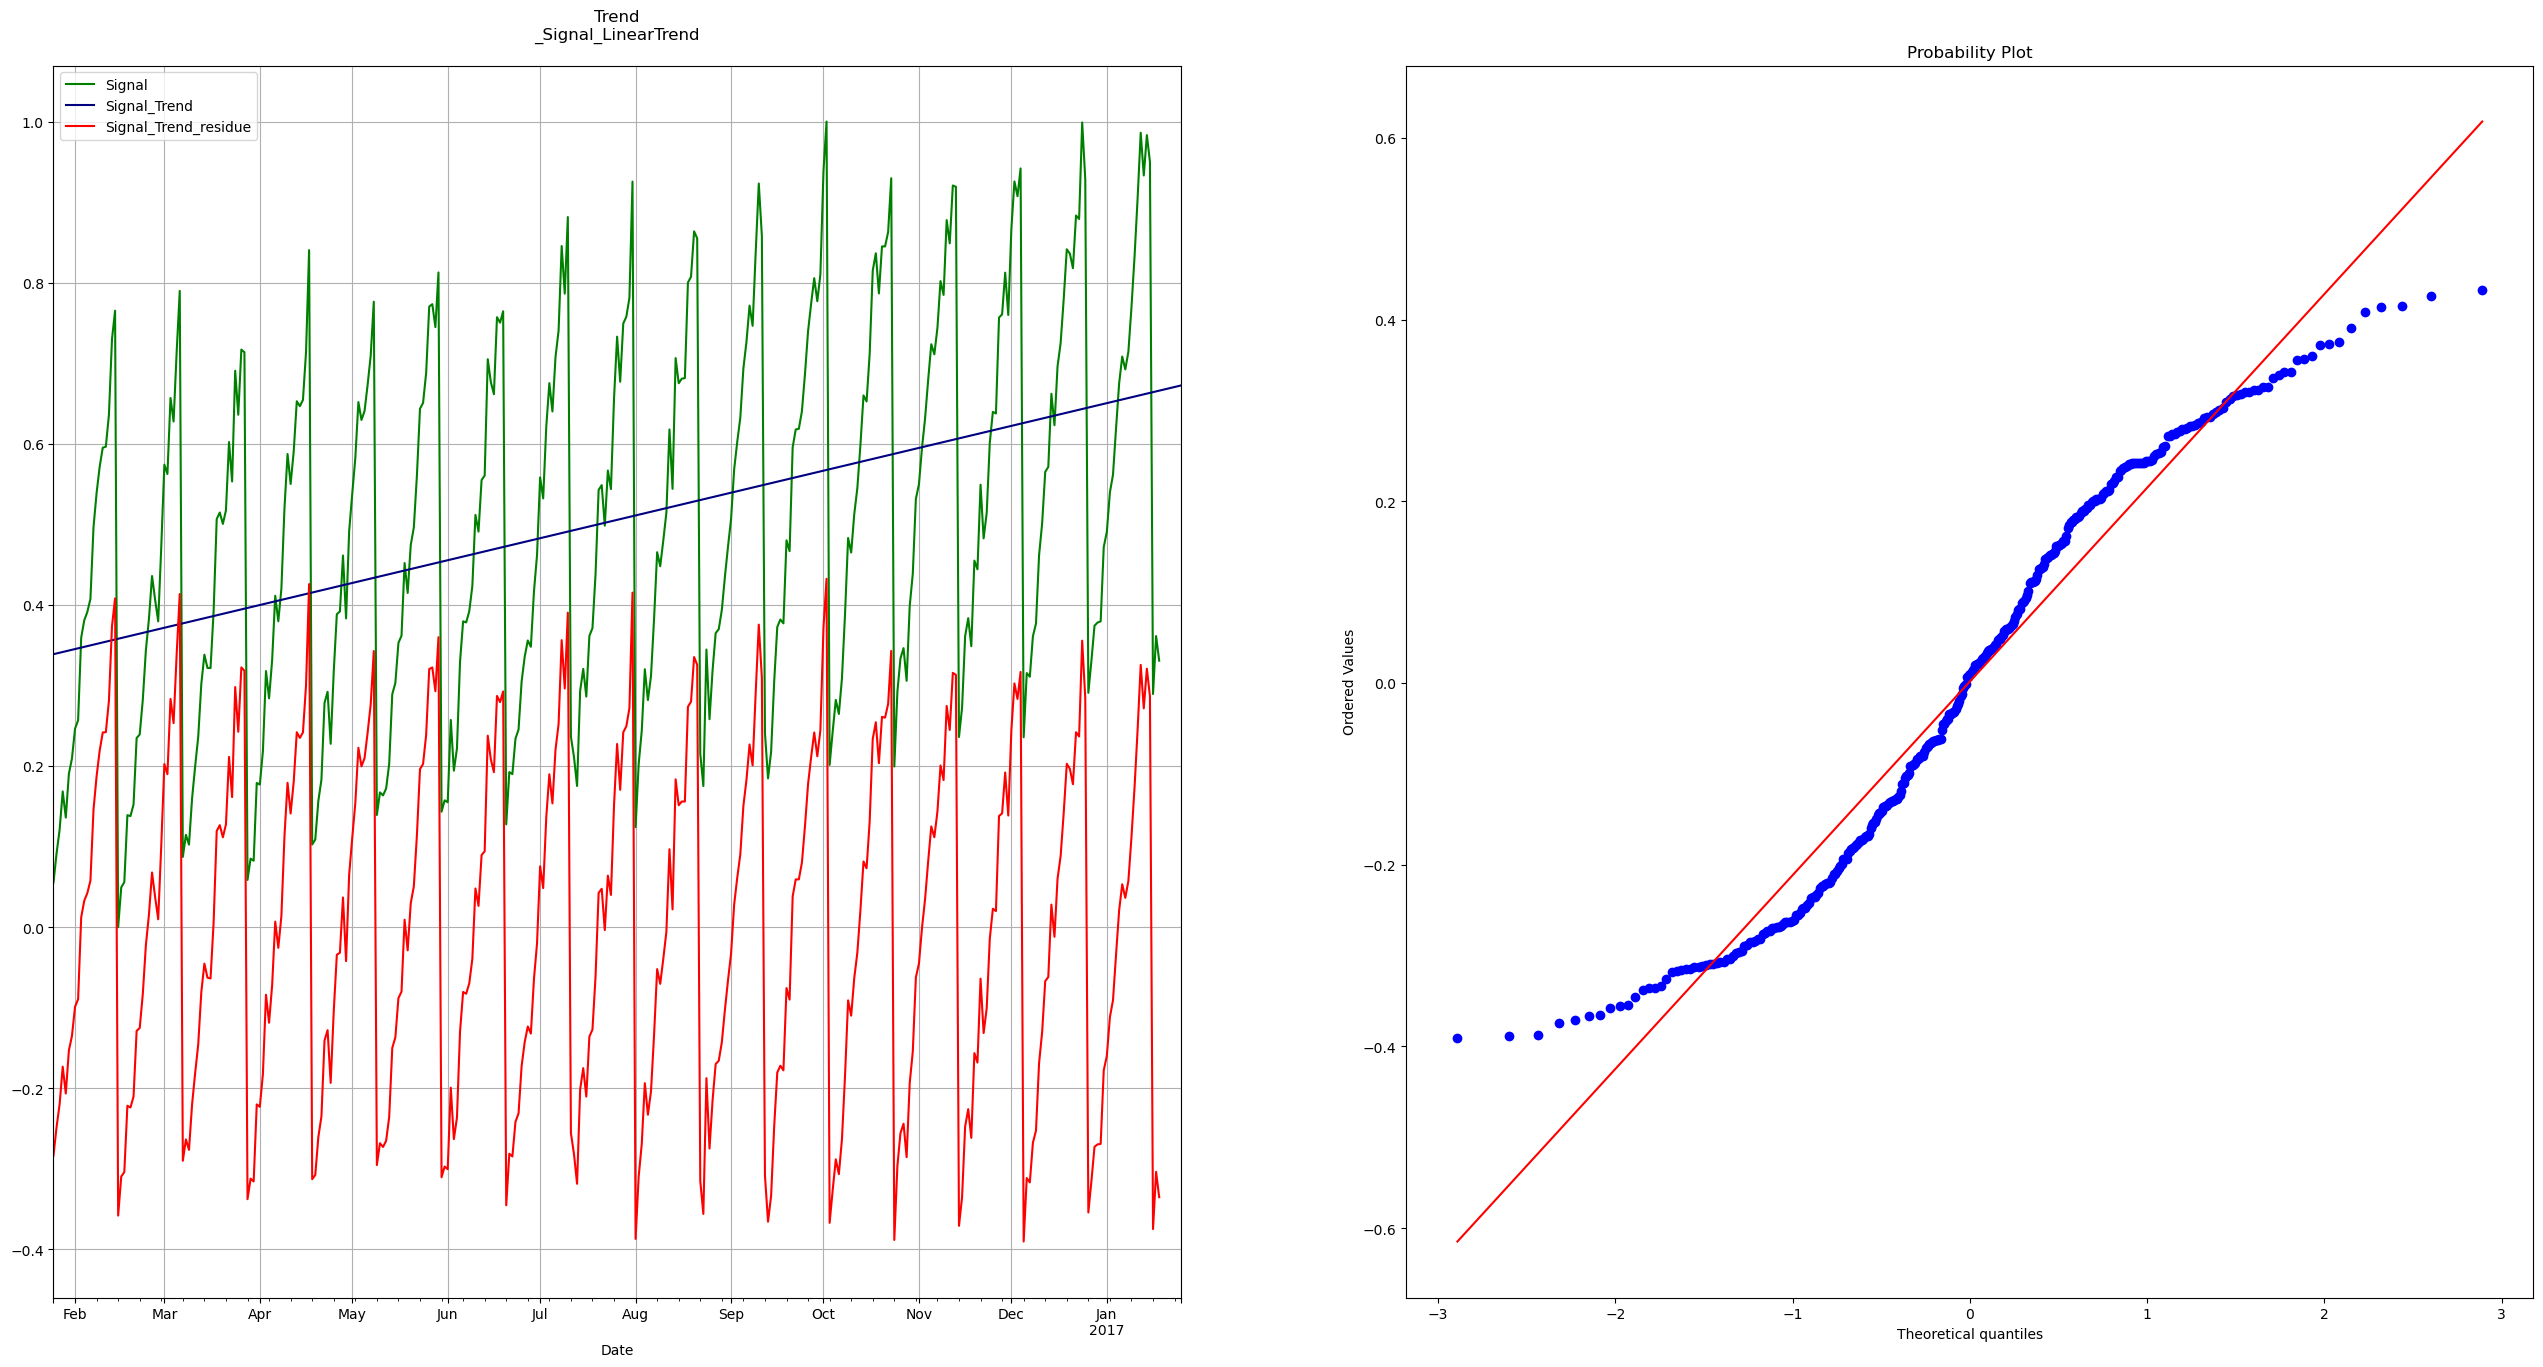

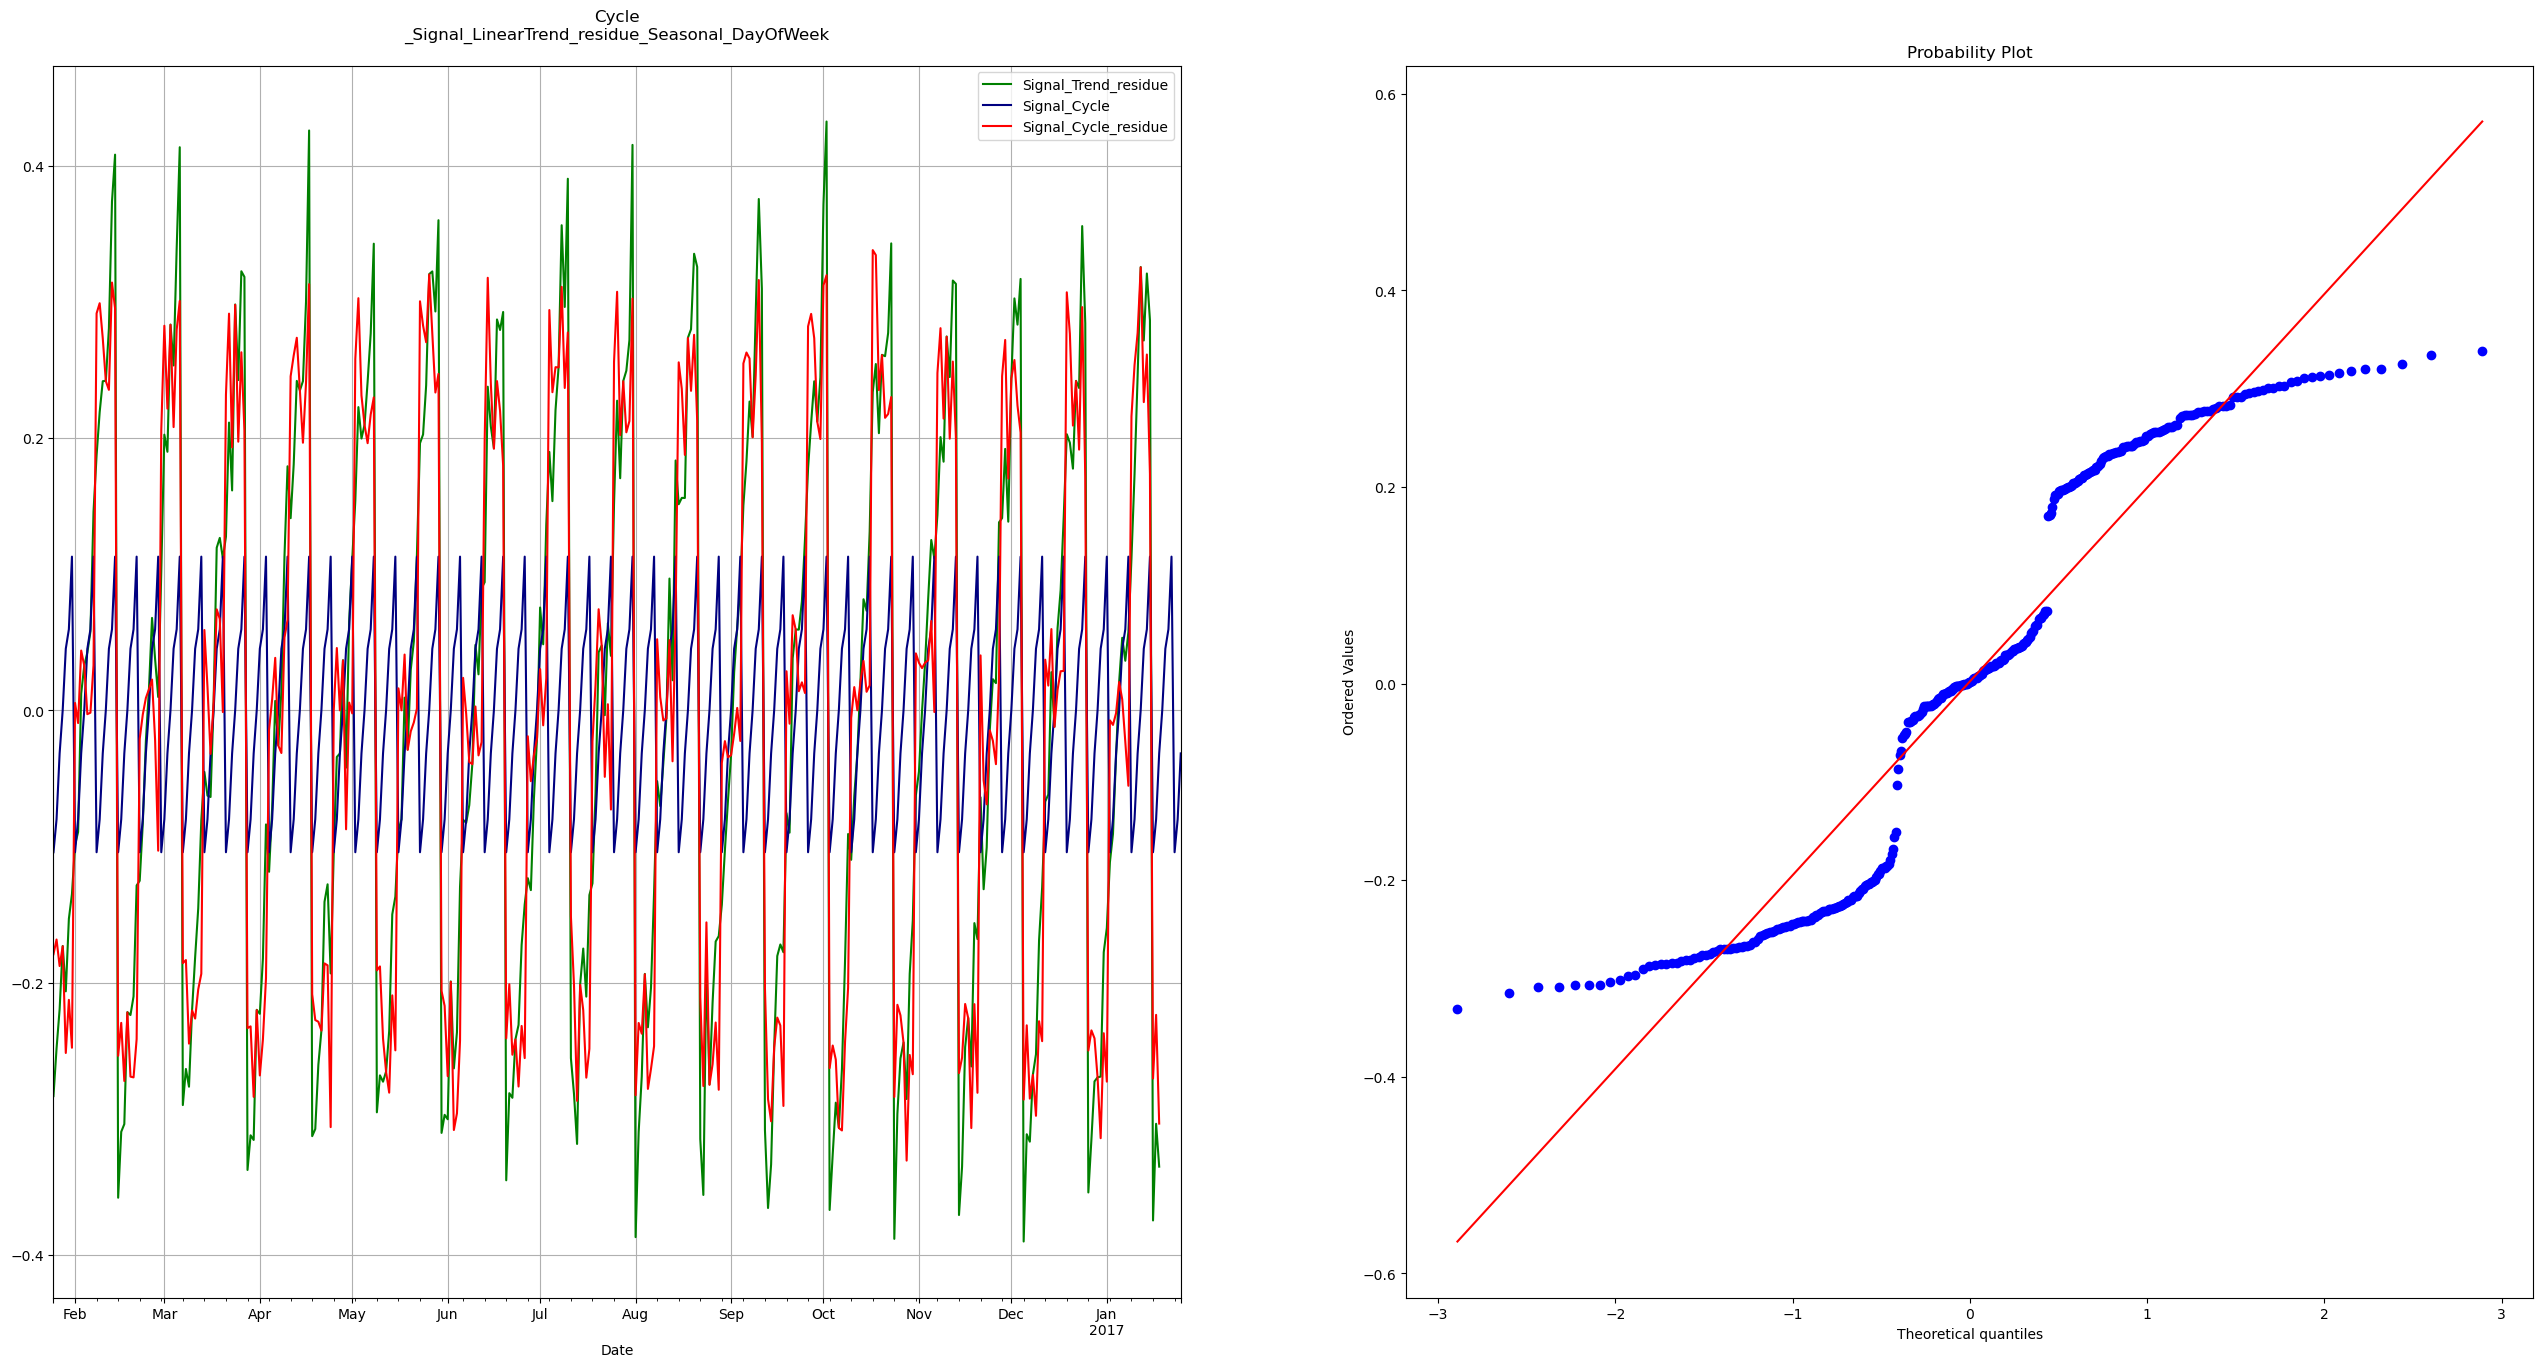

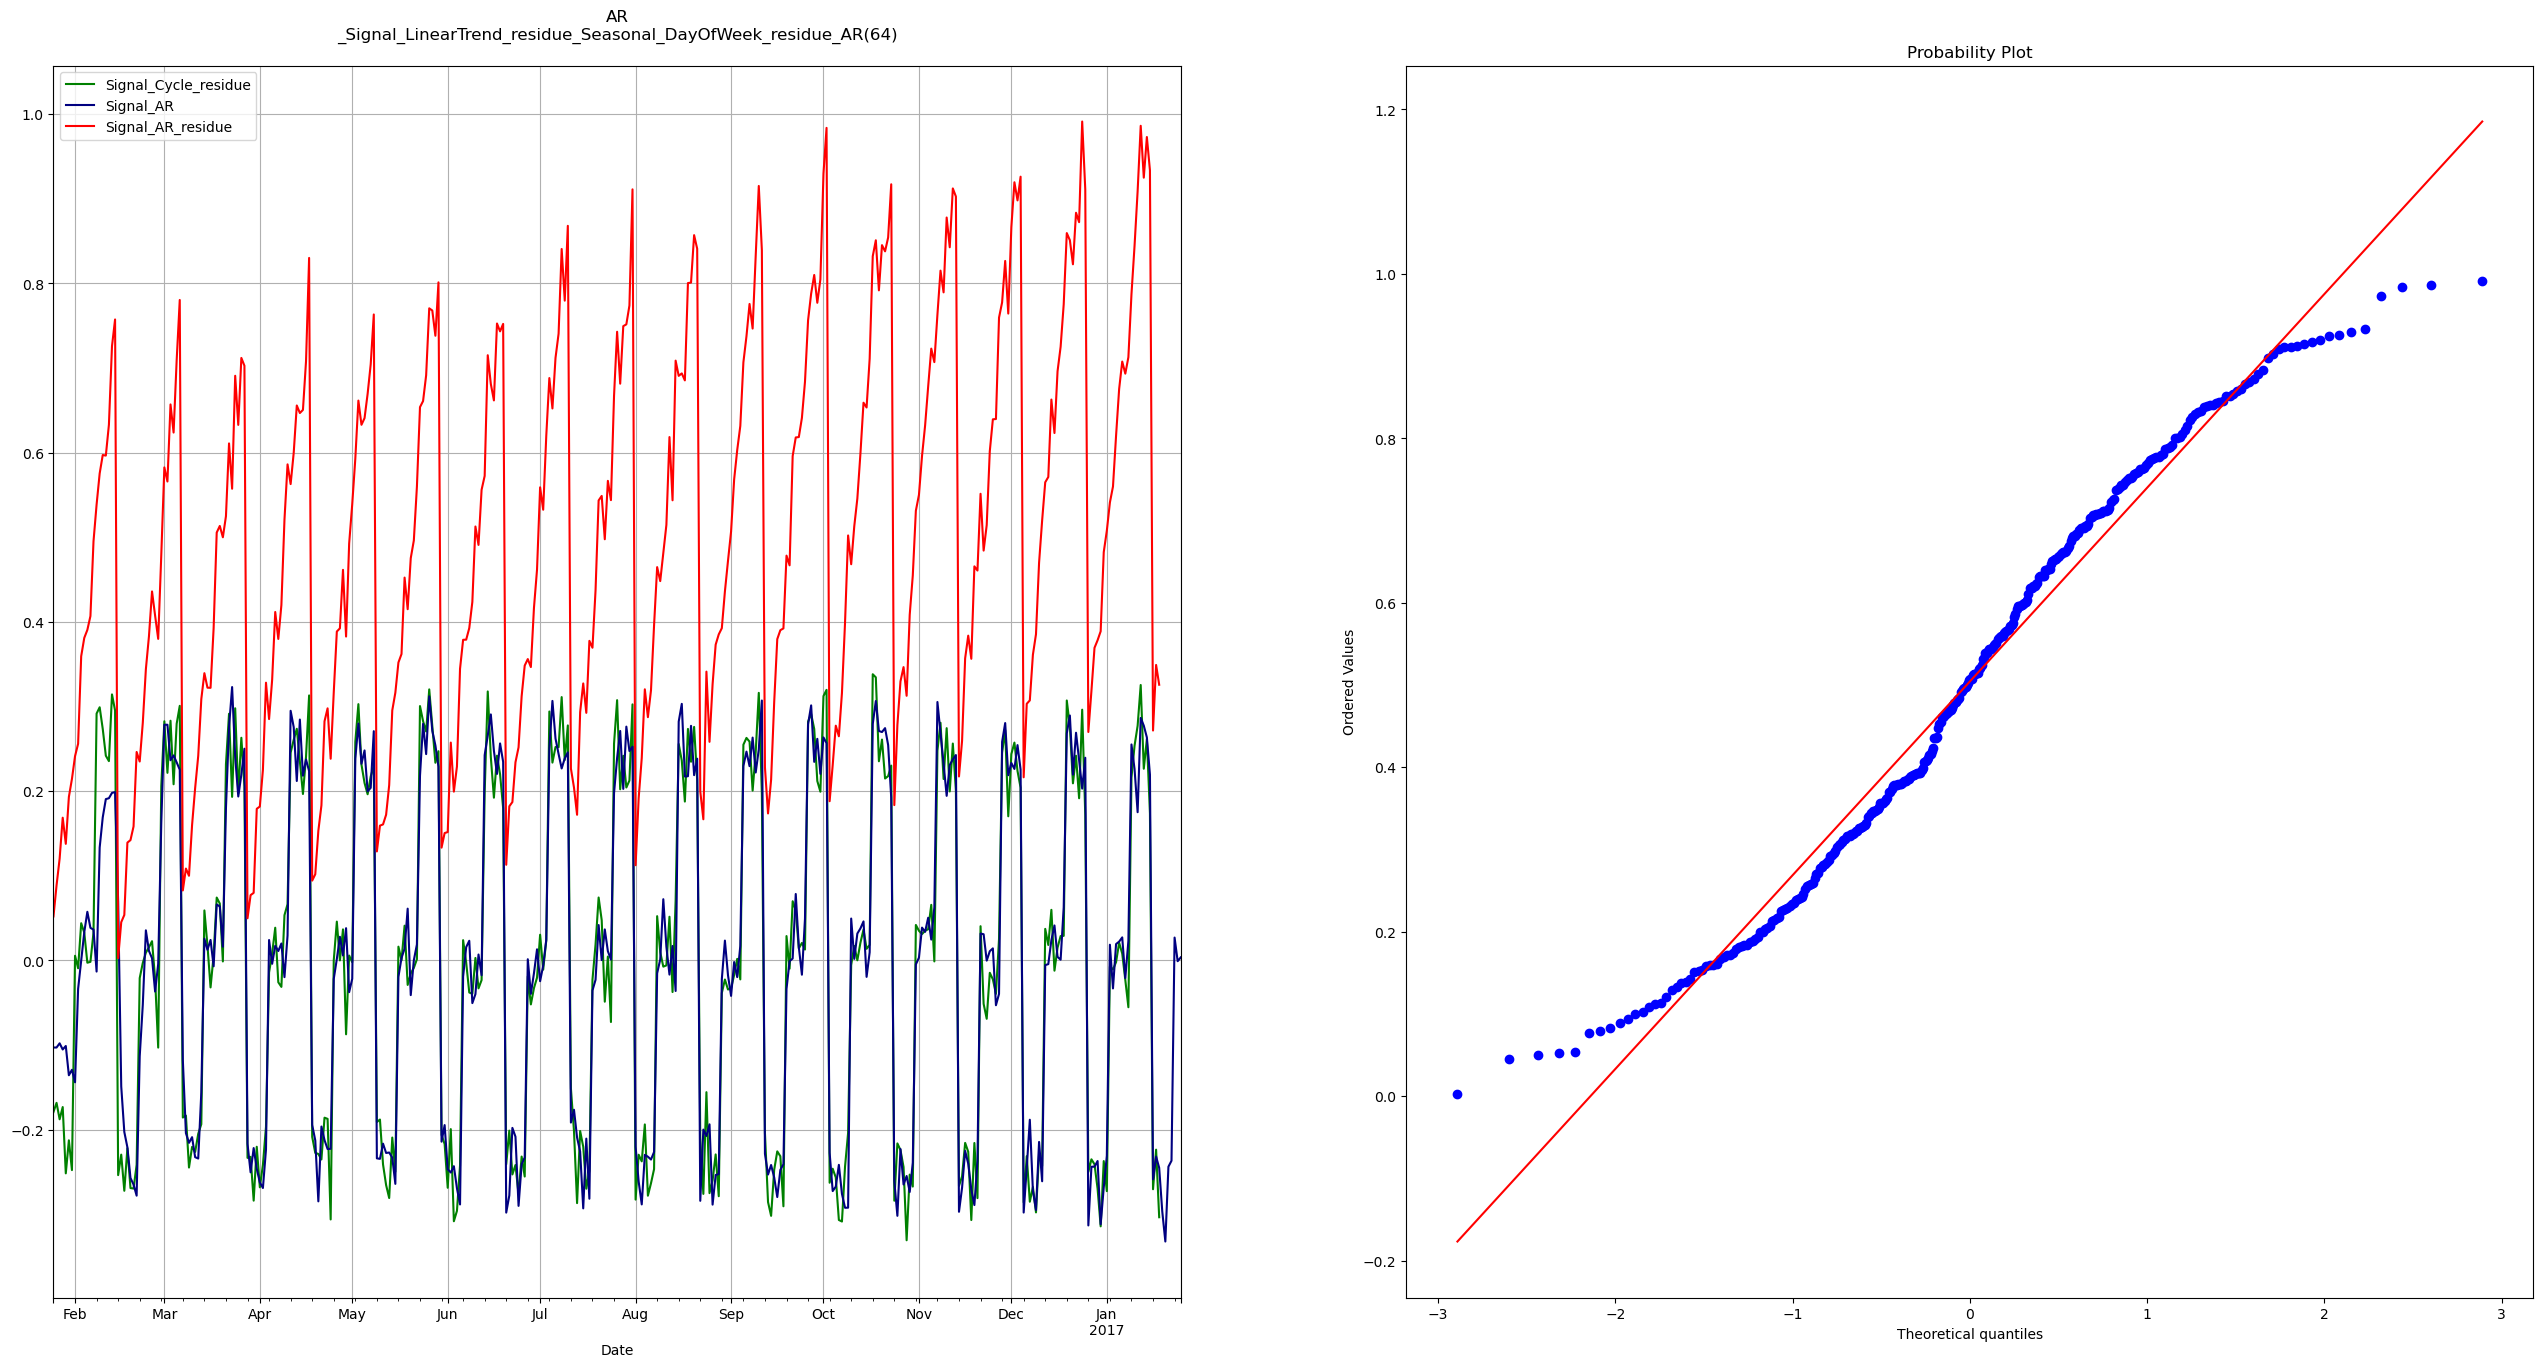

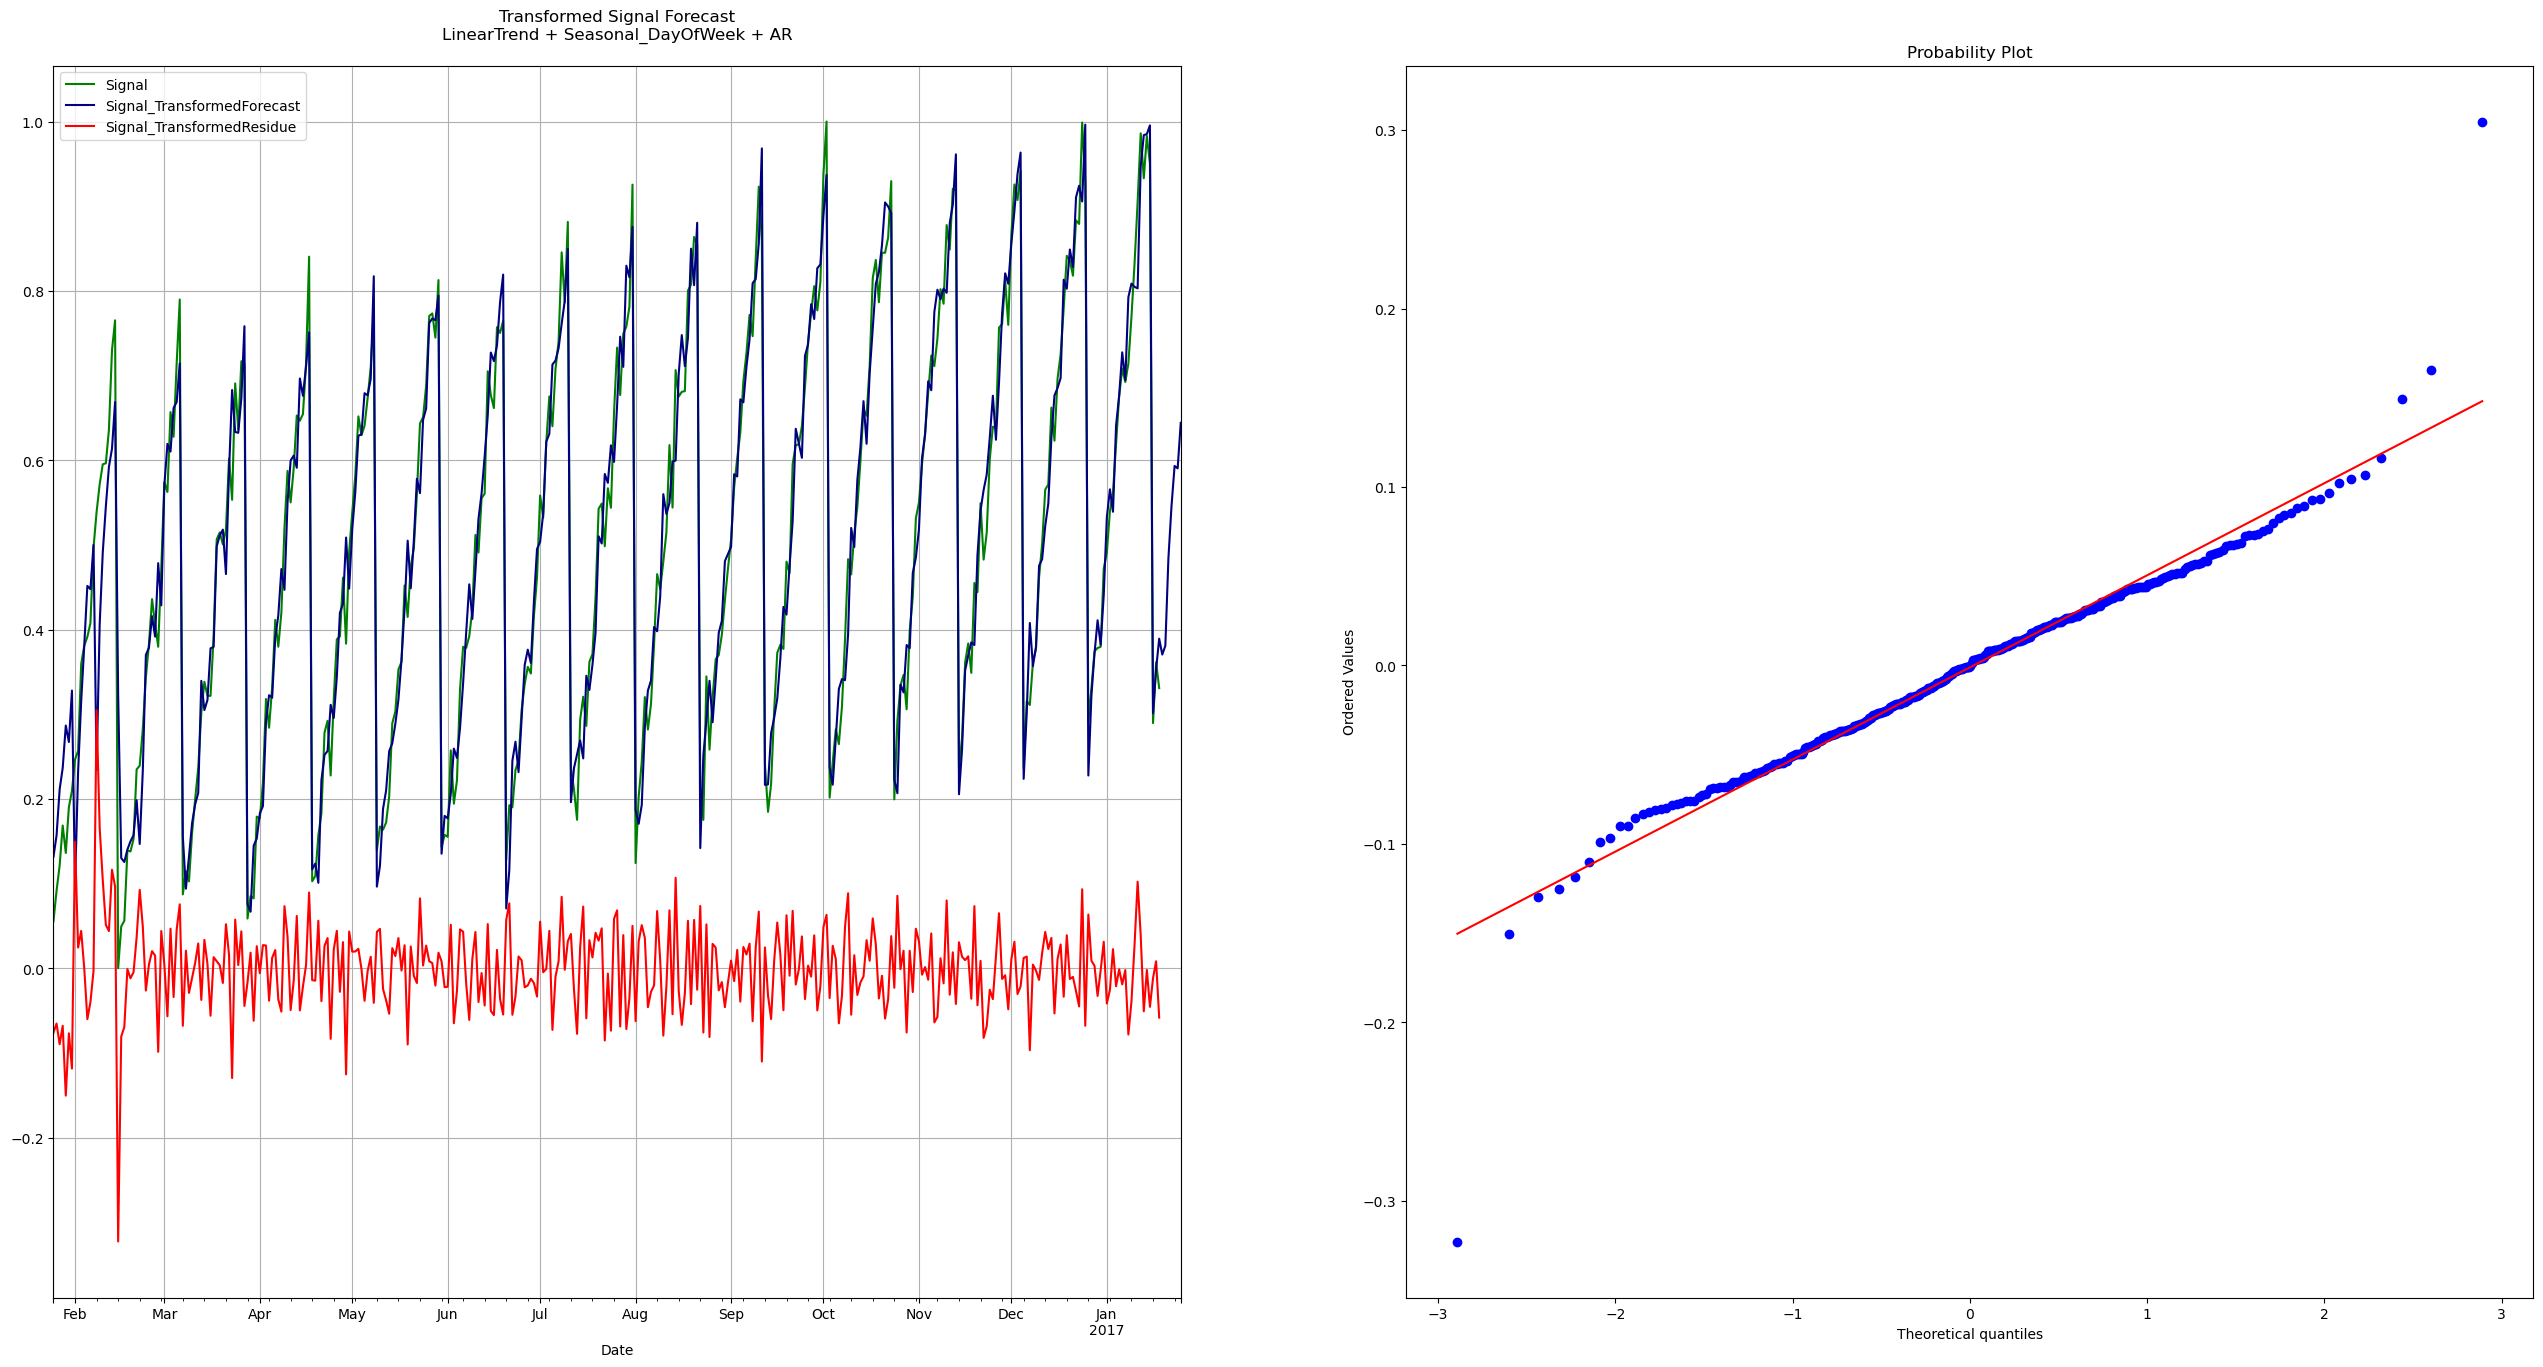

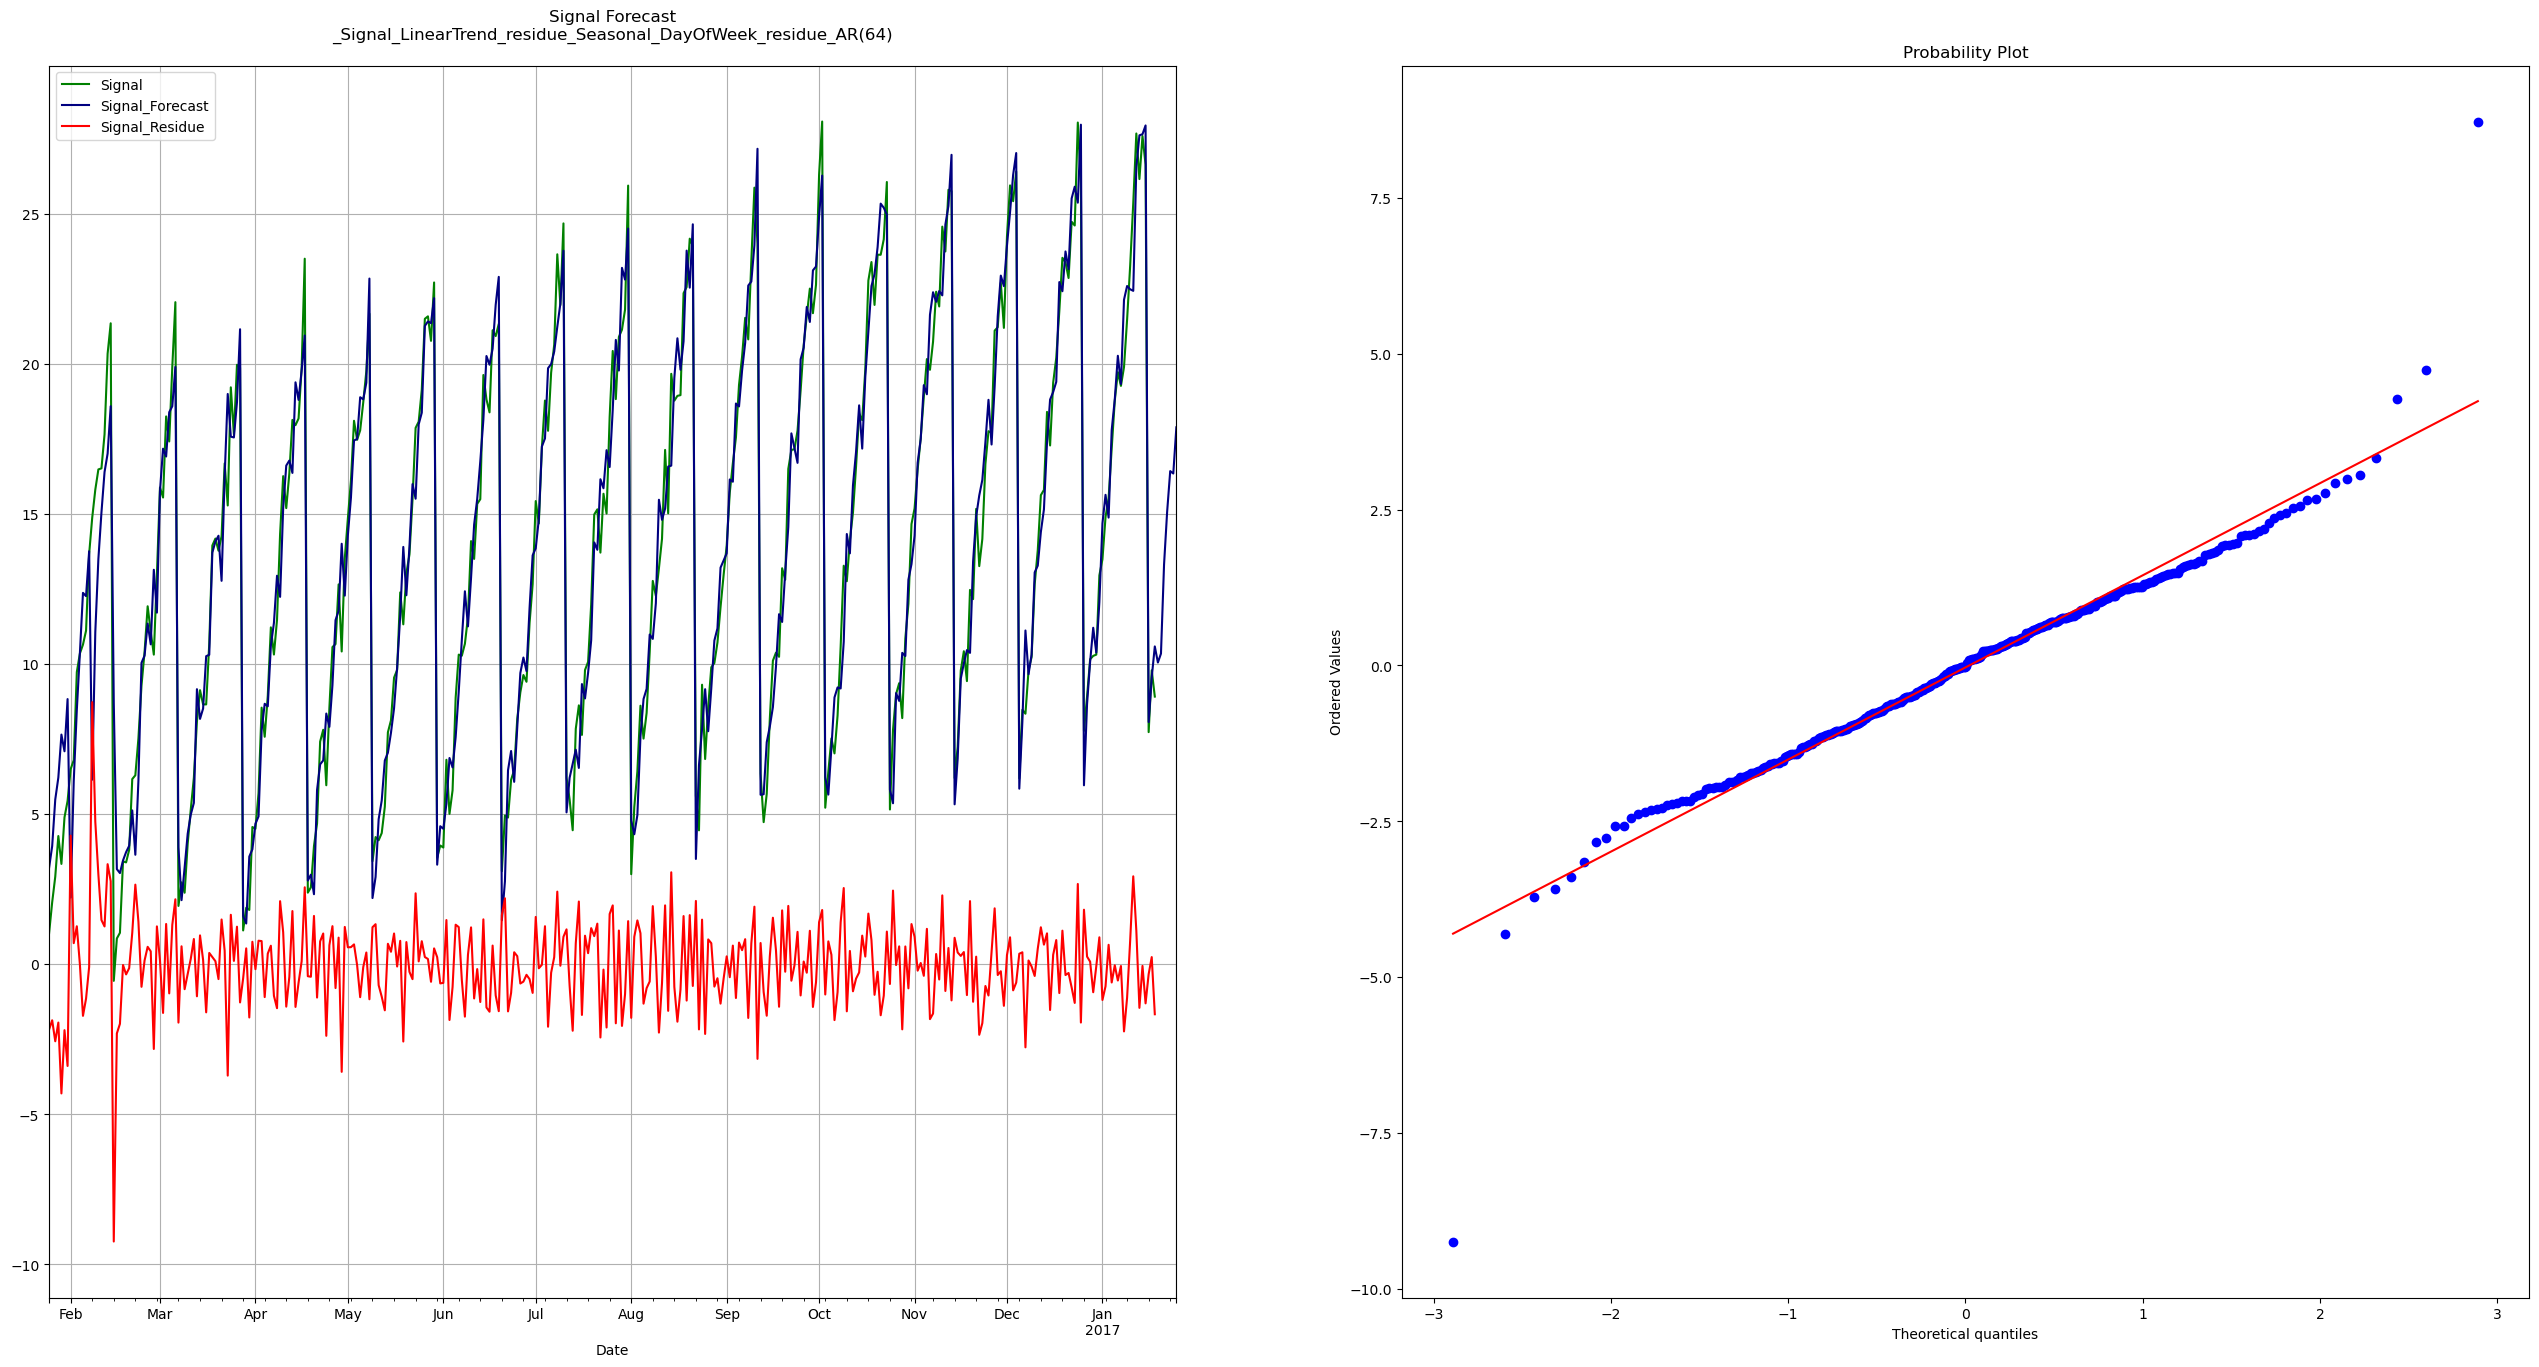

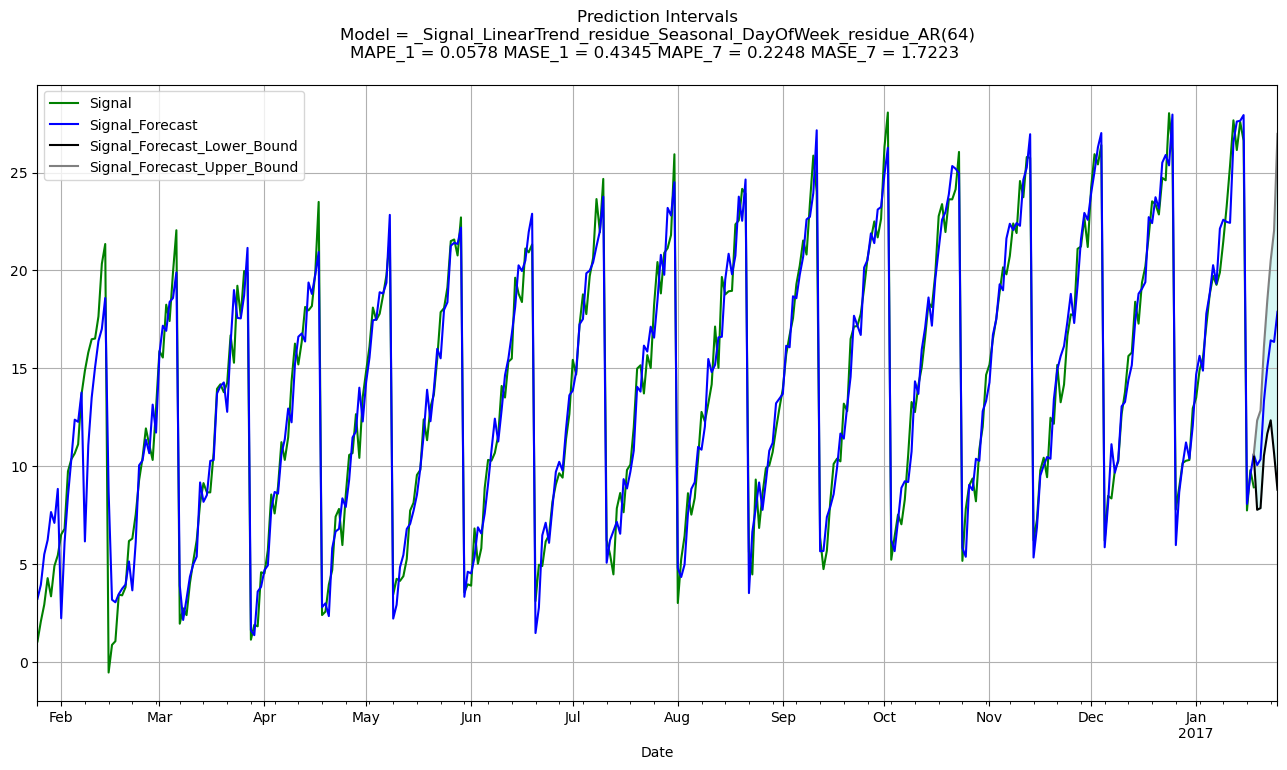

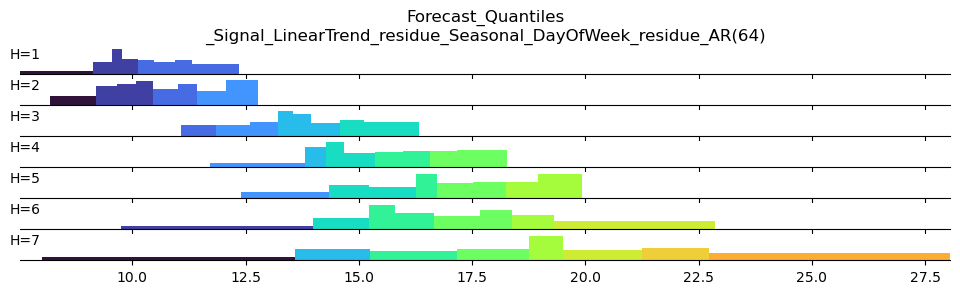

In [13]:
lEngine_reloaded.standardPlots()

In [14]:
df_forecast.describe()

Signal  row_number  Date_Normalized  Signal_scaled     _Signal  \
count  360.000000  367.000000       367.000000     367.000000  360.000000   
mean    13.872436  183.000000         0.651246       0.504203    0.504131   
std      6.779245  106.088014         0.377537       0.234902    0.236840   
min     -0.557670    0.000000         0.000000       0.000000    0.000000   
25%      8.516113   91.500000         0.325623       0.318562    0.317002   
50%     13.779164  183.000000         0.651246       0.501202    0.500872   
75%     19.311028  274.500000         0.976868       0.691511    0.694134   
max     28.066060  366.000000         1.302491       1.000000    1.000000   

       _Signal_LinearTrend  _Signal_LinearTrend_residue  \
count           367.000000                   360.000000   
mean              0.505586                     0.001733   
std               0.096657                     0.216219   
min               0.338855                    -0.390153   
25%               0.422221                    -0.182749   
50%               0.505586                     0.009554   
75%               0.588952                     0.196277   
max               0.672318                     0.432459   

       _Signal_LinearTrend_residue_Seasonal_DayOfWeek  \
count                                      367.000000   
mean                                        -0.000300   
std                                          0.072453   
min                                         -0.104231   
25%                                         -0.080002   
50%                                          0.000260   
75%                                          0.059513   
max                                          0.112880   

       _Signal_LinearTrend_residue_Seasonal_DayOfWeek_residue  \
count                                         360.000000        
mean                                            0.002045        
std                                             0.205394        
min                                            -0.330723        
25%                                            -0.220225        
50%                                             0.001525        
75%                                             0.214401        
max                                             0.338020        

       _Signal_LinearTrend_residue_Seasonal_DayOfWeek_residue_AR(64)  ...  \
count                                         367.000000              ...   
mean                                            0.000147              ...   
std                                             0.199689              ...   
min                                            -0.332205              ...   
25%                                            -0.218419              ...   
50%                                             0.003160              ...   
75%                                             0.219447              ...   
max                                             0.322895              ...   

       Signal_Forecast_Upper_Bound  Signal_Forecast_Quantile_2  \
count                     7.000000                    7.000000   
mean                     18.464807                    9.809611   
std                       5.232108                    1.958252   
min                      12.330047                    7.528534   
25%                      14.467000                    8.097121   
50%                      18.470104                    9.757946   
75%                      21.272625                   11.395266   
max                      26.974251                   12.396024   

       Signal_Forecast_Quantile_14  Signal_Forecast_Quantile_26  \
count                     7.000000                     7.000000   
mean                     12.270592                    13.114520   
std                       2.265833                     2.574774   
min                       9.126783                     9.552700   
25%                      10.525789                    11.1279

In [15]:
df_forecast_aftrer_reload.describe()

Signal  row_number  Date_Normalized  Signal_scaled     _Signal  \
count  360.000000  367.000000       367.000000     367.000000  360.000000   
mean    13.872436  183.000000         0.651246       0.504203    0.504131   
std      6.779245  106.088014         0.377537       0.234902    0.236840   
min     -0.557670    0.000000         0.000000       0.000000    0.000000   
25%      8.516113   91.500000         0.325623       0.318562    0.317002   
50%     13.779164  183.000000         0.651246       0.501202    0.500872   
75%     19.311028  274.500000         0.976868       0.691511    0.694134   
max     28.066060  366.000000         1.302491       1.000000    1.000000   

       _Signal_LinearTrend  _Signal_LinearTrend_residue  \
count           367.000000                   360.000000   
mean              0.505586                     0.001733   
std               0.096657                     0.216219   
min               0.338855                    -0.390153   
25%               0.422221                    -0.182749   
50%               0.505586                     0.009554   
75%               0.588952                     0.196277   
max               0.672318                     0.432459   

       _Signal_LinearTrend_residue_Seasonal_DayOfWeek  \
count                                      367.000000   
mean                                        -0.000300   
std                                          0.072453   
min                                         -0.104231   
25%                                         -0.080002   
50%                                          0.000260   
75%                                          0.059513   
max                                          0.112880   

       _Signal_LinearTrend_residue_Seasonal_DayOfWeek_residue  \
count                                         360.000000        
mean                                            0.002045        
std                                             0.205394        
min                                            -0.330723        
25%                                            -0.220225        
50%                                             0.001525        
75%                                             0.214401        
max                                             0.338020        

       _Signal_LinearTrend_residue_Seasonal_DayOfWeek_residue_AR(64)  ...  \
count                                         367.000000              ...   
mean                                            0.000147              ...   
std                                             0.199689              ...   
min                                            -0.332205              ...   
25%                                            -0.218419              ...   
50%                                             0.003160              ...   
75%                                             0.219447              ...   
max                                             0.322895              ...   

       Signal_Forecast_Upper_Bound  Signal_Forecast_Quantile_2  \
count                     7.000000                    7.000000   
mean                     18.464807                    9.809611   
std                       5.232108                    1.958252   
min                      12.330047                    7.528534   
25%                      14.467000                    8.097121   
50%                      18.470104                    9.757946   
75%                      21.272625                   11.395266   
max                      26.974251                   12.396024   

       Signal_Forecast_Quantile_14  Signal_Forecast_Quantile_26  \
count                     7.000000                     7.000000   
mean                     12.270592                    13.114520   
std                       2.265833                     2.574774   
min                       9.126783                     9.552700   
25%                      10.525789                    11.1279